In [ ]:
 #한글 글꼴 깨짐 현상 해결 - 한글 글꼴 다운로드

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#해당 코드 실행 후 런타임 초기화

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and direc

In [ ]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='NanumGothic')

In [ ]:
mpl.rc('axes', unicode_minus=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/시계열팀 문화데이터 공모전/수집 데이터 공유/문화데이터찐찐최종_더미.csv")
display(df)

In [ ]:
data=df.copy()

In [ ]:
print(df)

             축제명 광역단체명 기초단체명 축제유형  예산합계   국비   지방비  방문객_내국인    검색량   교통점수  \
0         종로한복축제    서울   종로구   전통   100    0   100   157541   4770  82.94   
1        구로G페스티벌    서울   구로구   공연   868    0   868   100000  30470  81.23   
2        한성백제문화제    서울   송파구   역사  1967  175  1172   249000  43560  79.15   
3    4.19혁명국민문화제    서울   강북구   역사   770  300   470    57000     12  78.05   
4         서울장미축제    서울   중랑구   자연   600    0   600   730000    760  78.74   
..           ...   ...   ...  ...   ...  ...   ...      ...    ...    ...   
117        천령문화제    경남   함양군   전통   500    0   500    25000    390  83.51   
118      합천바캉스축제    경남   합천군   체험   260    0   260    51212     60  85.72   
119        대야문화제    경남   합천군   체험   610    0   610    30000    980  85.72   
120        월대천축제    제주   제주시   체험    20    0    20     1000     20  84.74   
121       이호테우축제    제주   제주시   체험    30    0    30    29500     35  84.74   

     ...  공연  문화예술  역사  자연  전통  체험  특산물  기초단체명_  광역단체명_  개최계절  
0    ...   

In [ ]:
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1, inplace=True)

In [ ]:
df.loc[df.loc[:, '기초단체명'].str.endswith('시'), '기초단체명_'] = '시'
df.loc[df.loc[:, '기초단체명'].str.endswith('군'), '기초단체명_'] = '군'
df.loc[df.loc[:, '기초단체명'].str.endswith('구'), '기초단체명_'] = '구'
df.loc[df['광역단체명'].isin(['서울', '경기']), '광역단체명_'] = '수도권'
df.loc[df['광역단체명'].isin(['부산', '대구', '인천', '광주', '대전', '울산']), '광역단체명_'] = '광역시'
df.loc[df['광역단체명'].isin(['강원', '경남', '전북', '충남', '경북', '전남', '세종', '제주', '충북']), '광역단체명_'] = '도'

### 축제유형 시각화

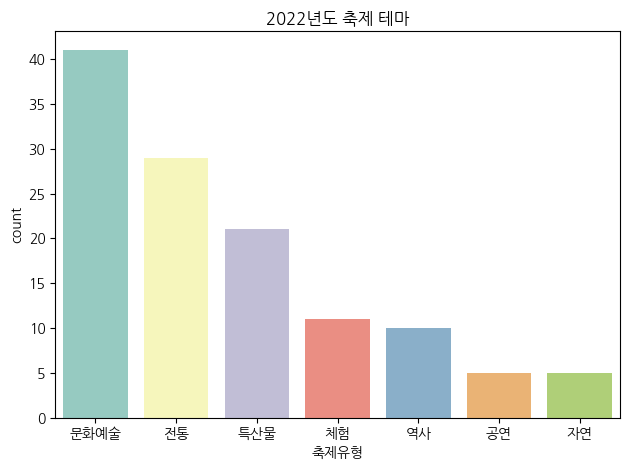

In [ ]:
sns.countplot(x='축제유형', data=df, palette='Set3', order=df['축제유형'].value_counts().index)
plt.title('2022년도 축제 테마')
plt.tight_layout()
plt.show()

### 개최월 시각화

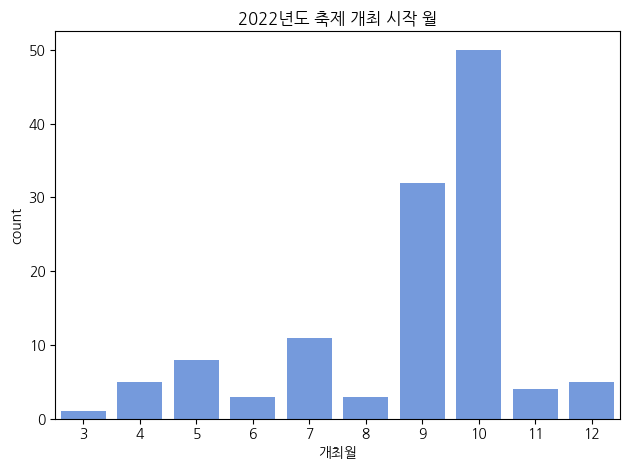

In [ ]:
sns.countplot(x='개최월', data=df, color='cornflowerblue')
plt.title('2022년도 축제 개최 시작 월')
plt.tight_layout()
plt.show()

### 개최 시작 계절 시각화

In [ ]:
seasonmap = {3:'봄', 4:'봄', 5:'봄', 6:'여름', 7:'여름', 8:'여름',
             9:'가을', 10:'가을', 11:'가을', 12:'겨울'}
df['개최계절'] = df['개최월'].map(seasonmap)

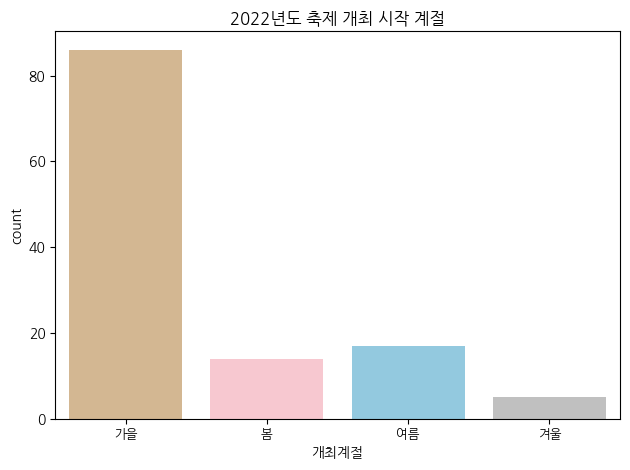

In [ ]:
color_palette = {
    "봄": "pink",
    "여름": "skyblue",
    "가을": "burlywood",
    "겨울": "silver"
}

sns.countplot(x='개최계절', data=df, palette=color_palette)
plt.title('2022년도 축제 개최 시작 계절')
plt.xticks(fontsize=9)
plt.tight_layout()
plt.show()

### 개최 기간 시각화

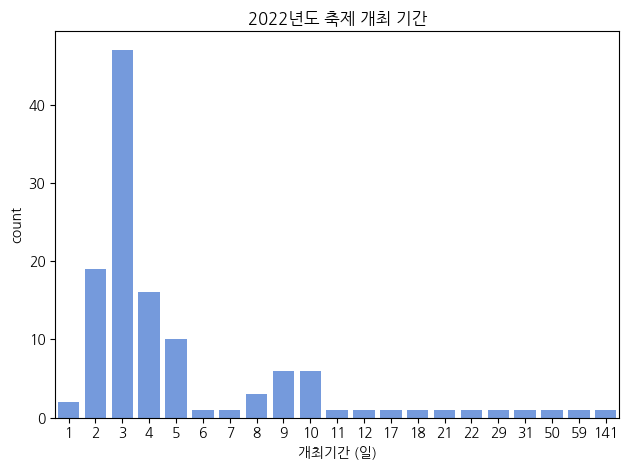

In [ ]:
sns.countplot(x='개최기간', data=df, color='cornflowerblue')
plt.title('2022년도 축제 개최 기간')
plt.xlabel('개최기간 (일)')
plt.tight_layout()
plt.show()

### 개최지(광연단체) 시각화

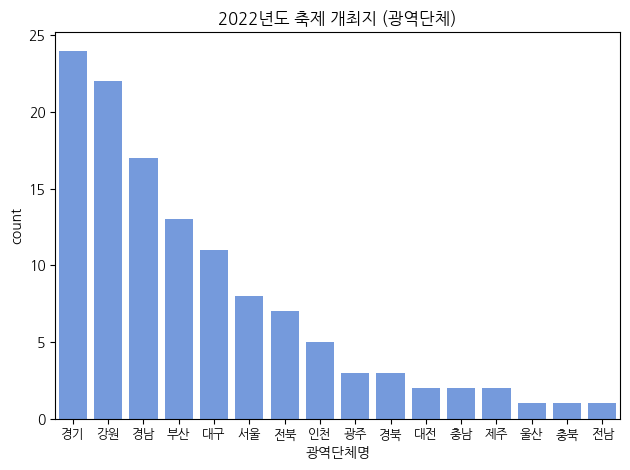

In [ ]:
sns.countplot(x='광역단체명', data=df, color='cornflowerblue',
              order=df['광역단체명'].value_counts().index)
plt.title('2022년도 축제 개최지 (광역단체)')
plt.xticks(fontsize=9)
plt.tight_layout()
plt.show()

### 개최지(광연단체_단위) 시각화

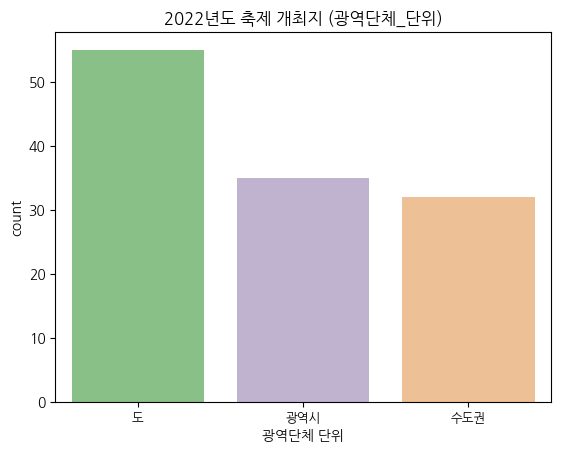

In [ ]:
sns.countplot(x='광역단체명_', data=df, order=df['광역단체명_'].value_counts().index,
              palette='Accent')
plt.title('2022년도 축제 개최지 (광역단체_단위)')
plt.xlabel('광역단체 단위')
plt.xticks(fontsize=9)
plt.show()

### 광역단체별 교통문화지수 시각화

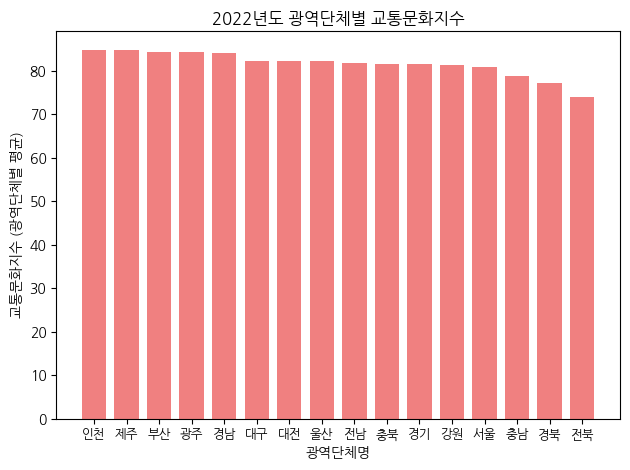

In [ ]:
plt.bar(x=df.groupby('광역단체명').mean().sort_values(by=['교통점수'], axis=0, ascending=False).index,
        height=df.groupby('광역단체명').mean().sort_values(by=['교통점수'], axis=0, ascending=False)['교통점수'],
        color='lightcoral', width=0.75)
plt.title('2022년도 광역단체별 교통문화지수')
plt.xlabel('광역단체명')
plt.xticks(fontsize=9)
plt.ylabel('교통문화지수 (광역단체별 평균)')
plt.tight_layout()
plt.show()

### 광역단체별 주변 관광명소 개수 시각화

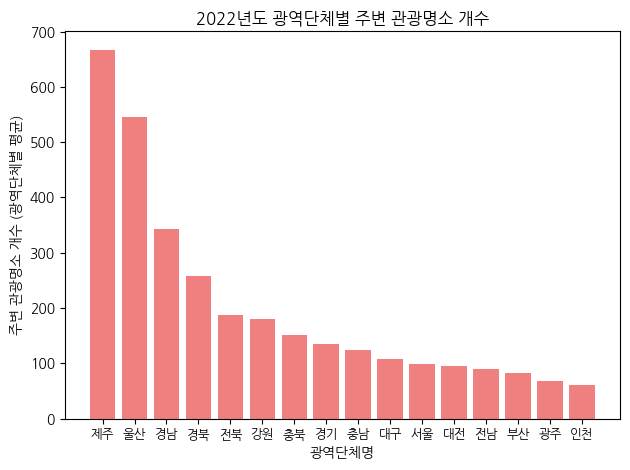

In [ ]:
plt.bar(x=df.groupby('광역단체명').mean().sort_values(by=['주변관광명소개수'], axis=0, ascending=False).index,
        height=df.groupby('광역단체명').mean().sort_values(by=['주변관광명소개수'], axis=0, ascending=False)['주변관광명소개수'],
        color='lightcoral')
plt.title('2022년도 광역단체별 주변 관광명소 개수')
plt.xlabel('광역단체명')
plt.xticks(fontsize=9)
plt.ylabel('주변 관광명소 개수 (광역단체별 평균)')
plt.tight_layout()
plt.show()

### 국비 예산 유무 시각화

In [ ]:
govbud = []

for i in df['국비']:
    if i !=0 :
        govbud.append('국비 O')
    else:
        govbud.append('국비 X')

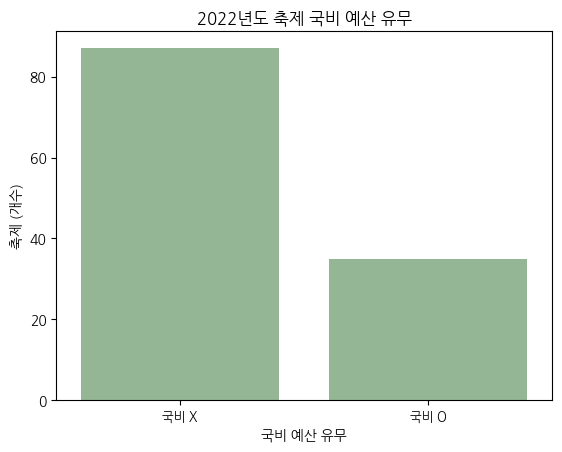

In [ ]:
sns.countplot(x=govbud, color='darkseagreen')
plt.title('2022년도 축제 국비 예산 유무')
plt.xlabel('국비 예산 유무')
plt.xticks(fontsize=9)
plt.ylabel('축제 (개수)')
plt.show()

### 지방비 예산 유무 시각화

In [ ]:
df.query('지방비==0')

,축제명,광역단체명,기초단체명,축제유형,예산합계,국비,지방비,방문객_내국인,검색량,교통점수,...,공연,문화예술,역사,자연,전통,체험,특산물,기초단체명_,광역단체명_,개최계절


지방비가 0인 행은 존재하지 않음

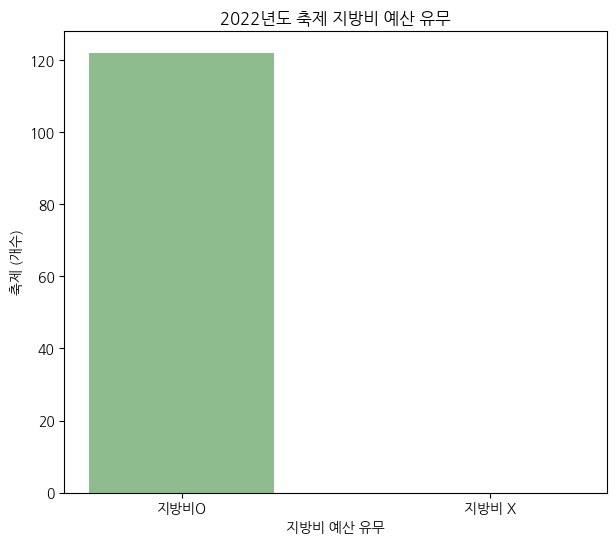

In [ ]:
plt.figure(figsize = (7,6))
plt.bar(['지방비O','지방비 X'],[df.shape[0],0], color='darkseagreen',width=0.6)
plt.title('2022년도 축제 지방비 예산 유무')
plt.xlabel('지방비 예산 유무')
plt.ylabel('축제 (개수)')
plt.grid(False)
plt.show()

In [ ]:
lines = df[['예산합계', '방문객_내국인', '검색량']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
sc = mm.fit_transform(lines)
sc = pd.DataFrame(sc, columns=lines.columns, index=lines.index)
sc = sc.sort_values('방문객_내국인', axis=0)
sc.reset_index(drop=True, inplace=True)

### 예산합계 시각화

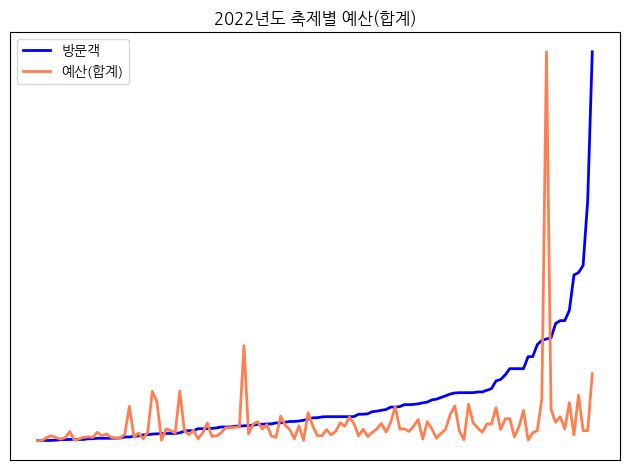

In [ ]:
plt.plot(sc['방문객_내국인'], color='blue', label='방문객', linewidth=2)
plt.plot(sc['예산합계'], color='coral', label='예산(합계)', linewidth=2)
plt.legend()
plt.title('2022년도 축제별 예산(합계)')
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.tight_layout()
plt.show()

### 검색량 시각화

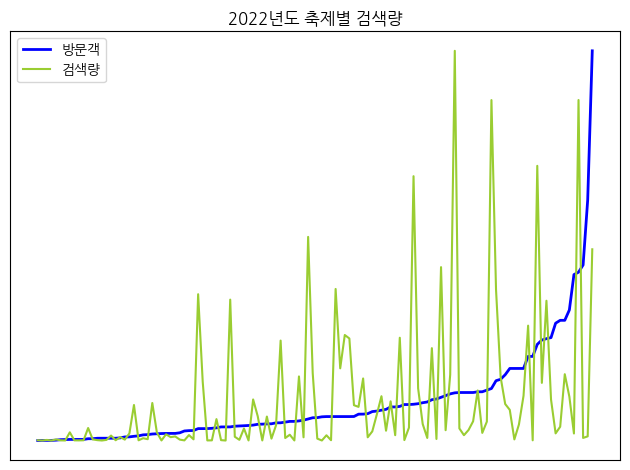

In [ ]:
plt.plot(sc['방문객_내국인'], color='blue', label='방문객', linewidth=2)
plt.plot(sc['검색량'], color='yellowgreen', label='검색량')
plt.legend()
plt.title('2022년도 축제별 검색량')
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.tight_layout()
plt.show()

### 여행관심도 시각화

In [ ]:
intrst = pd.read_csv('/content/drive/MyDrive/시계열팀 문화데이터 공모전/수집 데이터 공유/여행관심도_성별연령별지역별.csv')
intrst

,성별구분코드,연령대구분명,조사일자_월,서울특별시여행관심값,경기도인천광역시여행관심값,부산광역시여행관심값,충청남도대전광역시여행관심값,충청북도여행관심값,경상남도울산광역시여행관심값,경상북도대구광역시여행관심값,전라남도광주광역시여행관심값,전라북도여행관심값,강원여행관심값,제주도여행관심값
0,F,20대,1,3.476190,3.190476,3.523810,3.142857,2.952381,3.000000,3.000000,3.047619,3.238095,3.428571,3.761905
1,F,20대,2,3.809524,3.380952,3.809524,3.190476,3.333333,3.285714,3.523810,3.428571,3.380952,3.809524,4.095238
2,F,20대,3,3.695652,3.434783,3.782609,2.739130,2.869565,3.260870,3.347826,3.043478,2.913043,3.739130,4.434783
3,F,20대,4,3.400000,3.200000,3.700000,2.900000,2.800000,2.800000,3.000000,2.950000,3.050000,3.300000,4.100000
4,F,20대,5,3.590909,3.409091,3.772727,3.318182,3.363636,3.409091,3.272727,3.272727,3.318182,3.545455,4.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,M,60대,8,2.615385,2.884615,3.076923,2.615385,2.730769,2.730769,2.615385,2.923077,2.769231,3.307692,3.500000
116,M,60대,9,2.592593,3.074074,3.185185,2.888889,3.074074,3.000000,3.000000,3.148148,3.074074,3.555556,3.777778
117,M,60대,10,2.629630,2.777778,2.962963,2.888889,2.962963,2.925926,2.777778,2.666667,2.851852,3.407407,3.111111
118,M,60대,11,2.500000,2.818182,3.136364,3.045455,3.045455,3.000000,2.818182,3.181818,3.000000,3.545455,3.272727


In [ ]:
intrst.replace('F', '여자', inplace=True)
intrst.replace('M', '남자', inplace=True)
newidx = ['성별구분코드', '연령대구분명', '조사일자_월', '서울', '경기/인천', '부산', '충남/대전', '충북',
          '경남/울산', '경북/대구', '전남/광주', '전북', '강원', '제주']
intrst.columns = newidx

In [ ]:
intrst1 = intrst.groupby('성별구분코드').mean().iloc[:, 1:]
intrst1

,서울,경기/인천,부산,충남/대전,충북,경남/울산,경북/대구,전남/광주,전북,강원,제주
성별구분코드,,,,,,,,,,,
남자,2.941376,2.934321,3.262309,2.853758,2.853414,2.894670,2.822750,2.979570,2.875575,3.451018,3.629400
여자,3.251640,3.112687,3.485781,2.996576,2.993629,3.042591,2.983386,3.112394,3.075820,3.647283,3.911666


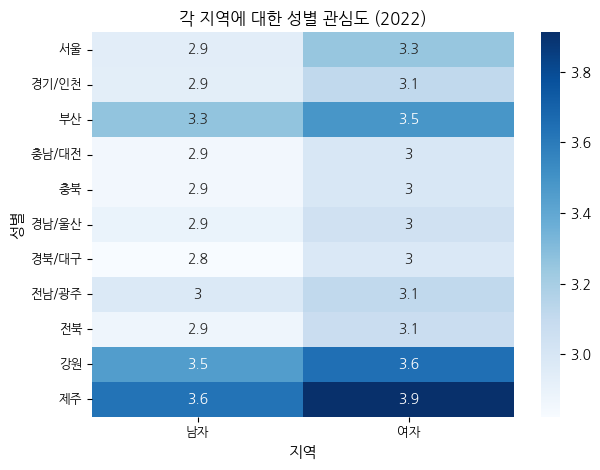

In [ ]:
sns.heatmap(intrst1.T, annot=True, cmap='Blues', cbar=True)
plt.xlabel('지역', fontsize=11)
plt.ylabel('성별', fontsize=11)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('각 지역에 대한 성별 관심도 (2022)')
plt.tight_layout()
plt.show()

In [ ]:
intrst2 = intrst.groupby('연령대구분명').mean().iloc[:, 1:]
intrst2

,서울,경기/인천,부산,충남/대전,충북,경남/울산,경북/대구,전남/광주,전북,강원,제주
연령대구분명,,,,,,,,,,,
20대,3.428250,3.185837,3.486008,2.965167,2.901731,3.038432,3.030279,2.936086,2.894753,3.392513,3.930229
30대,3.137164,2.958977,3.409749,2.868224,2.864926,2.939728,2.915877,3.038207,2.931216,3.594689,3.742933
40대,3.003710,2.983090,3.417717,2.928552,2.926929,2.911292,2.815616,3.129543,3.080600,3.614624,3.780949
50대,2.954626,2.976649,3.281962,2.918543,2.941991,2.972592,2.869133,3.089109,2.967024,3.566255,3.710769
60대,2.958789,3.012966,3.274788,2.945348,2.982031,2.981110,2.884435,3.036966,3.004895,3.577671,3.687786


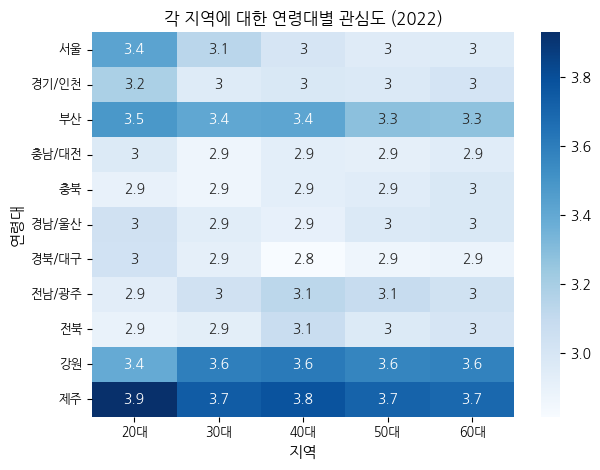

In [ ]:
sns.heatmap(intrst2.T, annot=True, cmap='Blues', cbar=True)
plt.xlabel('지역', fontsize=11)
plt.ylabel('연령대', fontsize=11)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('각 지역에 대한 연령대별 관심도 (2022)')
plt.tight_layout()
plt.show()

# Feature Importance

In [ ]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1','광역단체명','기초단체명','축제유형','국비','지방비'],axis=1, inplace=False)


y = data['방문객_내국인']/data['예산합계']
X = data.drop(['축제명','방문객_내국인','예산합계'],axis=1, inplace=False)

In [ ]:
data

,축제명,예산합계,방문객_내국인,검색량,교통점수,개최월,개최기간,20대지역관심도,30대지역관심도,40대지역관심도,...,군,구,주변관광명소개수,공연,문화예술,역사,자연,전통,체험,특산물
0,종로한복축제,100,157541,4770,82.94,10,2,3.428250,3.137164,3.003710,...,0,1,325,0,0,0,0,1,0,0
1,구로G페스티벌,868,100000,30470,81.23,9,3,3.428250,3.137164,3.003710,...,0,1,58,1,0,0,0,0,0,0
2,한성백제문화제,1967,249000,43560,79.15,9,3,3.428250,3.137164,3.003710,...,0,1,90,0,0,1,0,0,0,0
3,4.19혁명국민문화제,770,57000,12,78.05,4,12,3.428250,3.137164,3.003710,...,0,1,79,0,0,1,0,0,0,0
4,서울장미축제,600,730000,760,78.74,5,21,3.428250,3.137164,3.003710,...,0,1,51,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,천령문화제,500,25000,390,83.51,10,5,3.038432,2.939728,2.911292,...,1,0,315,0,0,0,0,1,0,0
118,합천바캉스축제,260,51212,60,85.72,7,8,3.038432,2.939728,2.911292,...,1,0,409,0,0,0,0,0,1,0
119,대야문화제,610,30000,980,85.72,9,3,3.038432,2.939728,2.911292,...,1,0,409,0,0,0,0,0,1,0
120,월대천축제,20,1000,20,84.74,7,2,3.930229,3.742933,3.780949,...,0,0,667,0,0,0,0,0,1,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   검색량       122 non-null    int64  
 1   교통점수      122 non-null    float64
 2   개최월       122 non-null    int64  
 3   개최기간      122 non-null    int64  
 4   20대지역관심도  122 non-null    float64
 5   30대지역관심도  122 non-null    float64
 6   40대지역관심도  122 non-null    float64
 7   50대지역관심도  122 non-null    float64
 8   60대지역관심도  122 non-null    float64
 9   수도권       122 non-null    int64  
 10  광역시       122 non-null    int64  
 11  도         122 non-null    int64  
 12  시         122 non-null    int64  
 13  군         122 non-null    int64  
 14  구         122 non-null    int64  
 15  주변관광명소개수  122 non-null    int64  
 16  공연        122 non-null    int64  
 17  문화예술      122 non-null    int64  
 18  역사        122 non-null    int64  
 19  자연        122 non-null    int64  
 20  전통        122 non-null    int64 

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [ ]:
# scaling

# scaler_ss = StandardScaler()
scaler_ss = MinMaxScaler()
scaler_ss.fit(X_train)
X_train_scaled = scaler_ss.transform(X_train)
X_test_scaled = scaler_ss.transform(X_test)

# scalerY = StandardScaler()
scalerY = MinMaxScaler()
scalerY.fit(np.array(y_train).reshape(-1,1))
y_train_scaled = scalerY.transform(np.array(y_train).reshape(-1,1))
y_test_scaled = scalerY.transform(np.array(y_test).reshape(-1,1))

In [ ]:
# 성능 평가 함수

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mse_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MSE: {2:.3F}, R2 score: {2:.3F}'.format(rmsle_val, rmse_val, mse_val, r2_score(y,pred)))

### LGBMRegressor

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor

lgb_r = LGBMRegressor(random_state=200)
lgb_r.fit(X_train_scaled, y_train_scaled)

y_pred = lgb_r.predict(X_test_scaled)

evaluate_regr(y_test_scaled, y_pred.reshape(-1,))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 97, number of used features: 18
[LightGBM] [Info] Start training from score 0.085132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<BarContainer object of 23 artists>

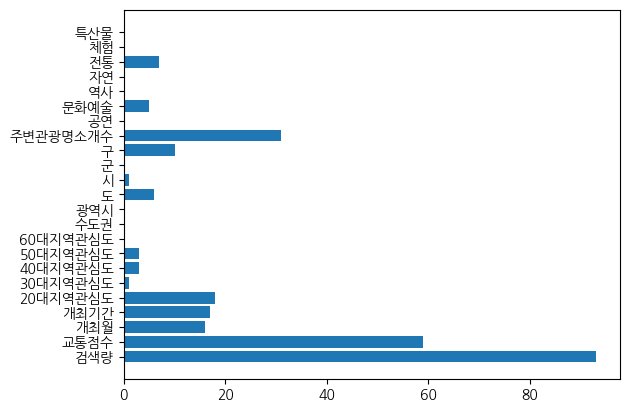

In [ ]:
plt.barh(X.columns, lgb_r.feature_importances_)

In [ ]:
lgbm_fi = pd.DataFrame(zip(X.columns, lgb_r.feature_importances_), columns=['feature','importance'])
lgbm_fi['importance'] = (lgbm_fi['importance'] - lgbm_fi['importance'].min())/lgbm_fi['importance'].max()
lgbm_fi

,feature,importance
0,검색량,1.000000
1,교통점수,0.634409
2,개최월,0.172043
3,개최기간,0.182796
4,20대지역관심도,0.193548
5,30대지역관심도,0.010753
6,40대지역관심도,0.032258
7,50대지역관심도,0.032258
8,60대지역관심도,0.000000
9,수도권,0.000000


### XGBoostRegressor

In [ ]:
from xgboost import XGBRegressor

xgb_best = XGBRegressor(learning_rate = 0.05, max_depth = 6, n_estimators = 400)
xgb_best.fit(X_train_scaled, y_train_scaled)

y_pred = xgb_best.predict(X_test_scaled)

evaluate_regr(y_test_scaled, y_pred.reshape(-1,))

RMSLE: 0.255, RMSE: 0.475, MSE: 0.200, R2 score: 0.200


<BarContainer object of 23 artists>

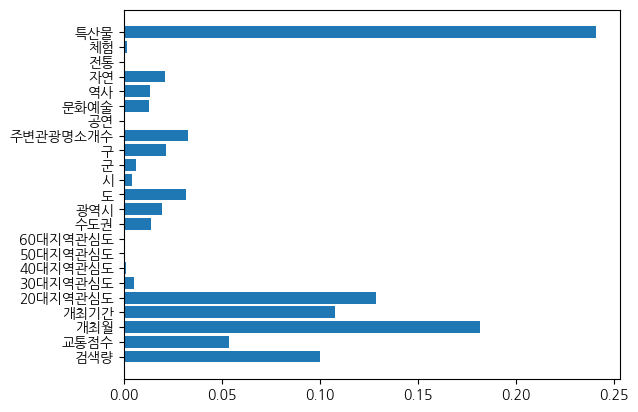

In [ ]:
plt.barh(X.columns, xgb_best.feature_importances_)

In [ ]:
xgb_fi = pd.DataFrame(zip(X.columns, xgb_best.feature_importances_), columns=['feature','importance'])
xgb_fi['importance'] = (xgb_fi['importance'] - xgb_fi['importance'].min())/xgb_fi['importance'].max()
xgb_fi

,feature,importance
0,검색량,0.415429
1,교통점수,0.222534
2,개최월,0.754063
3,개최기간,0.446968
4,20대지역관심도,0.533416
5,30대지역관심도,0.020219
6,40대지역관심도,0.003020
7,50대지역관심도,0.000000
8,60대지역관심도,0.000874
9,수도권,0.057166


### LinearRegression, Ridge


In [ ]:
# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train_scaled, y_train_scaled)

y_train_hat_scaled_lr = lr_reg.predict(X_train_scaled)
y_train_hat_lr = scalerY.inverse_transform(y_train_hat_scaled_lr)
y_test_hat_scaled_lr = lr_reg.predict(X_test_scaled)
y_test_hat_lr = scalerY.inverse_transform(y_test_hat_scaled_lr)

evaluate_regr(y_train_scaled, y_train_hat_lr.reshape(-1,))
evaluate_regr(y_test_scaled, y_test_hat_lr.reshape(-1,))

ridge_reg = Ridge()
ridge_reg.fit(X_train_scaled, y_train_scaled)

y_train_hat_scaled_ridge = ridge_reg.predict(X_train_scaled)
y_train_hat_ridge = scalerY.inverse_transform(y_train_hat_scaled_ridge)
y_test_hat_scaled_ridge = ridge_reg.predict(X_test_scaled)
y_test_hat_ridge = scalerY.inverse_transform(y_test_hat_scaled_ridge)

evaluate_regr(y_train_scaled, y_train_hat_ridge.reshape(-1,))
evaluate_regr(y_test_scaled, y_test_hat_ridge.reshape(-1,))

lasso_reg = Lasso()
lasso_reg.fit(X_train_scaled, y_train_scaled)

y_train_hat_scaled_lasso = lasso_reg.predict(X_train_scaled)
y_train_hat_lasso = scalerY.inverse_transform(y_train_hat_scaled_lasso.reshape(1,-1))
y_test_hat_scaled_lasso = lasso_reg.predict(X_test_scaled)
y_test_hat_lasso = scalerY.inverse_transform(y_test_hat_scaled_lasso.reshape(-1,1))

y_train_hat_lasso = y_train_hat_lasso.reshape(-1,1)
y_test_hat_lasso = y_test_hat_lasso.reshape(-1,1)

evaluate_regr(y_train_scaled, y_train_hat_lasso.reshape(-1,))
evaluate_regr(y_test_scaled, y_test_hat_lasso.reshape(-1,))


RMSLE: nan, RMSE: 385.973, MSE: 312.665, R2 score: 312.665
RMSLE: nan, RMSE: 414.483, MSE: 343.370, R2 score: 343.370
RMSLE: nan, RMSE: 358.810, MSE: 298.084, R2 score: 298.084
RMSLE: nan, RMSE: 372.224, MSE: 299.973, R2 score: 299.973
RMSLE: 5.590, RMSE: 286.738, MSE: 286.738, R2 score: 286.738
RMSLE: 5.542, RMSE: 286.646, MSE: 286.646, R2 score: 286.646


<function matplotlib.pyplot.show(close=None, block=None)>

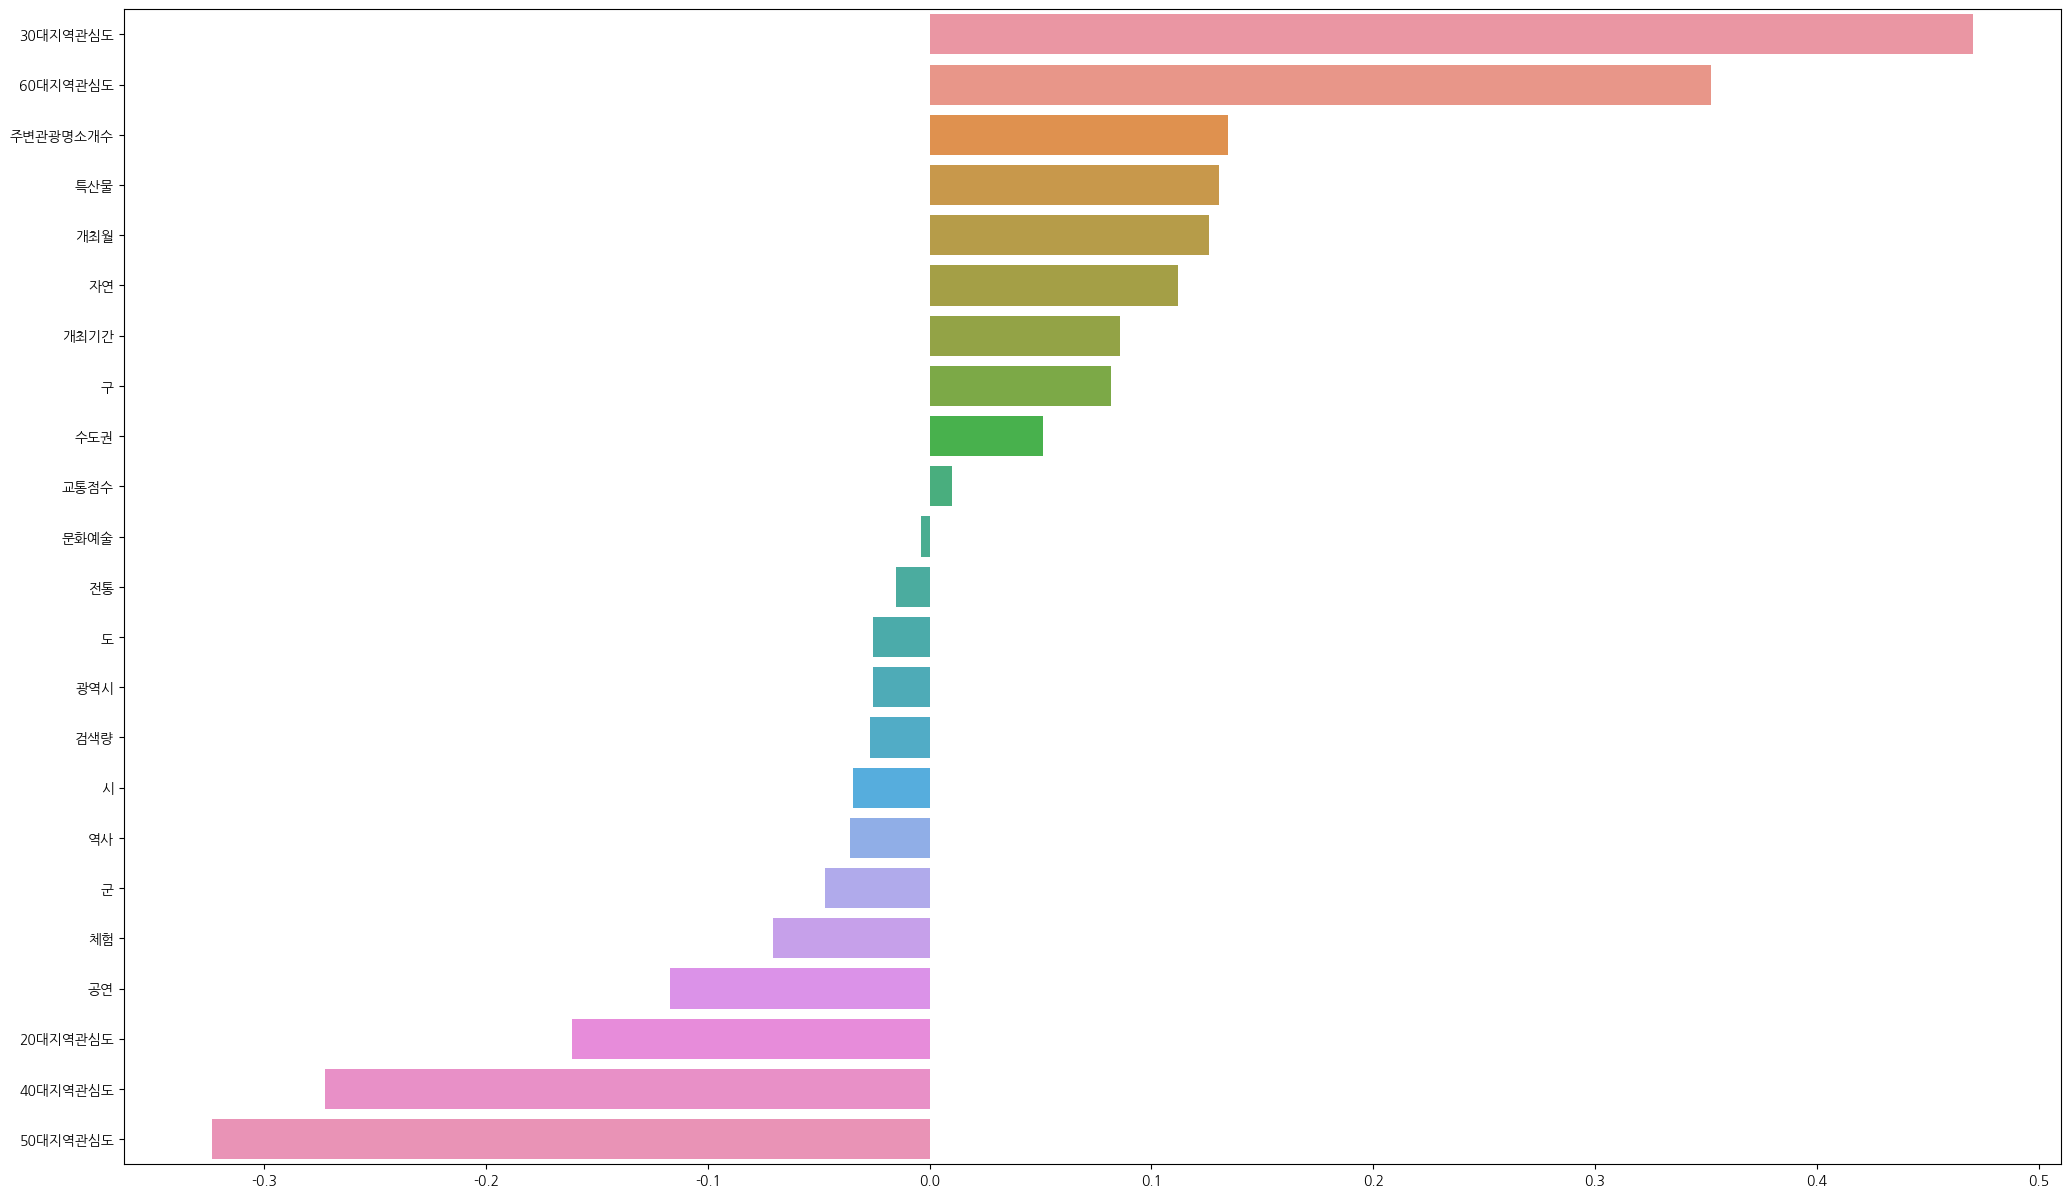

In [ ]:
# 각 feature의 회귀 계수 값 시각화 : LinearRegression
coef = pd.Series(lr_reg.coef_[0], index = X.columns)
coef_sort = coef.sort_values(ascending=False)

plt.figure(figsize = (25,15))
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show

In [ ]:
# x=coef_sort.values, y=coef_sort.index)

linear_fi = pd.DataFrame(zip(coef_sort.index, coef_sort.values), columns=['feature','importance'])
linear_fi['importance'] = pd.DataFrame(linear_fi['importance'] - linear_fi['importance'].min())
linear_fi['importance'] = linear_fi['importance']/linear_fi['importance'].max()
linear_fi

,feature,importance
0,30대지역관심도,1.000000
1,60대지역관심도,0.851289
2,주변관광명소개수,0.577035
3,특산물,0.571691
4,개최월,0.566184
5,자연,0.548458
6,개최기간,0.515714
7,구,0.510390
8,수도권,0.471720
9,교통점수,0.420369


<Axes: >

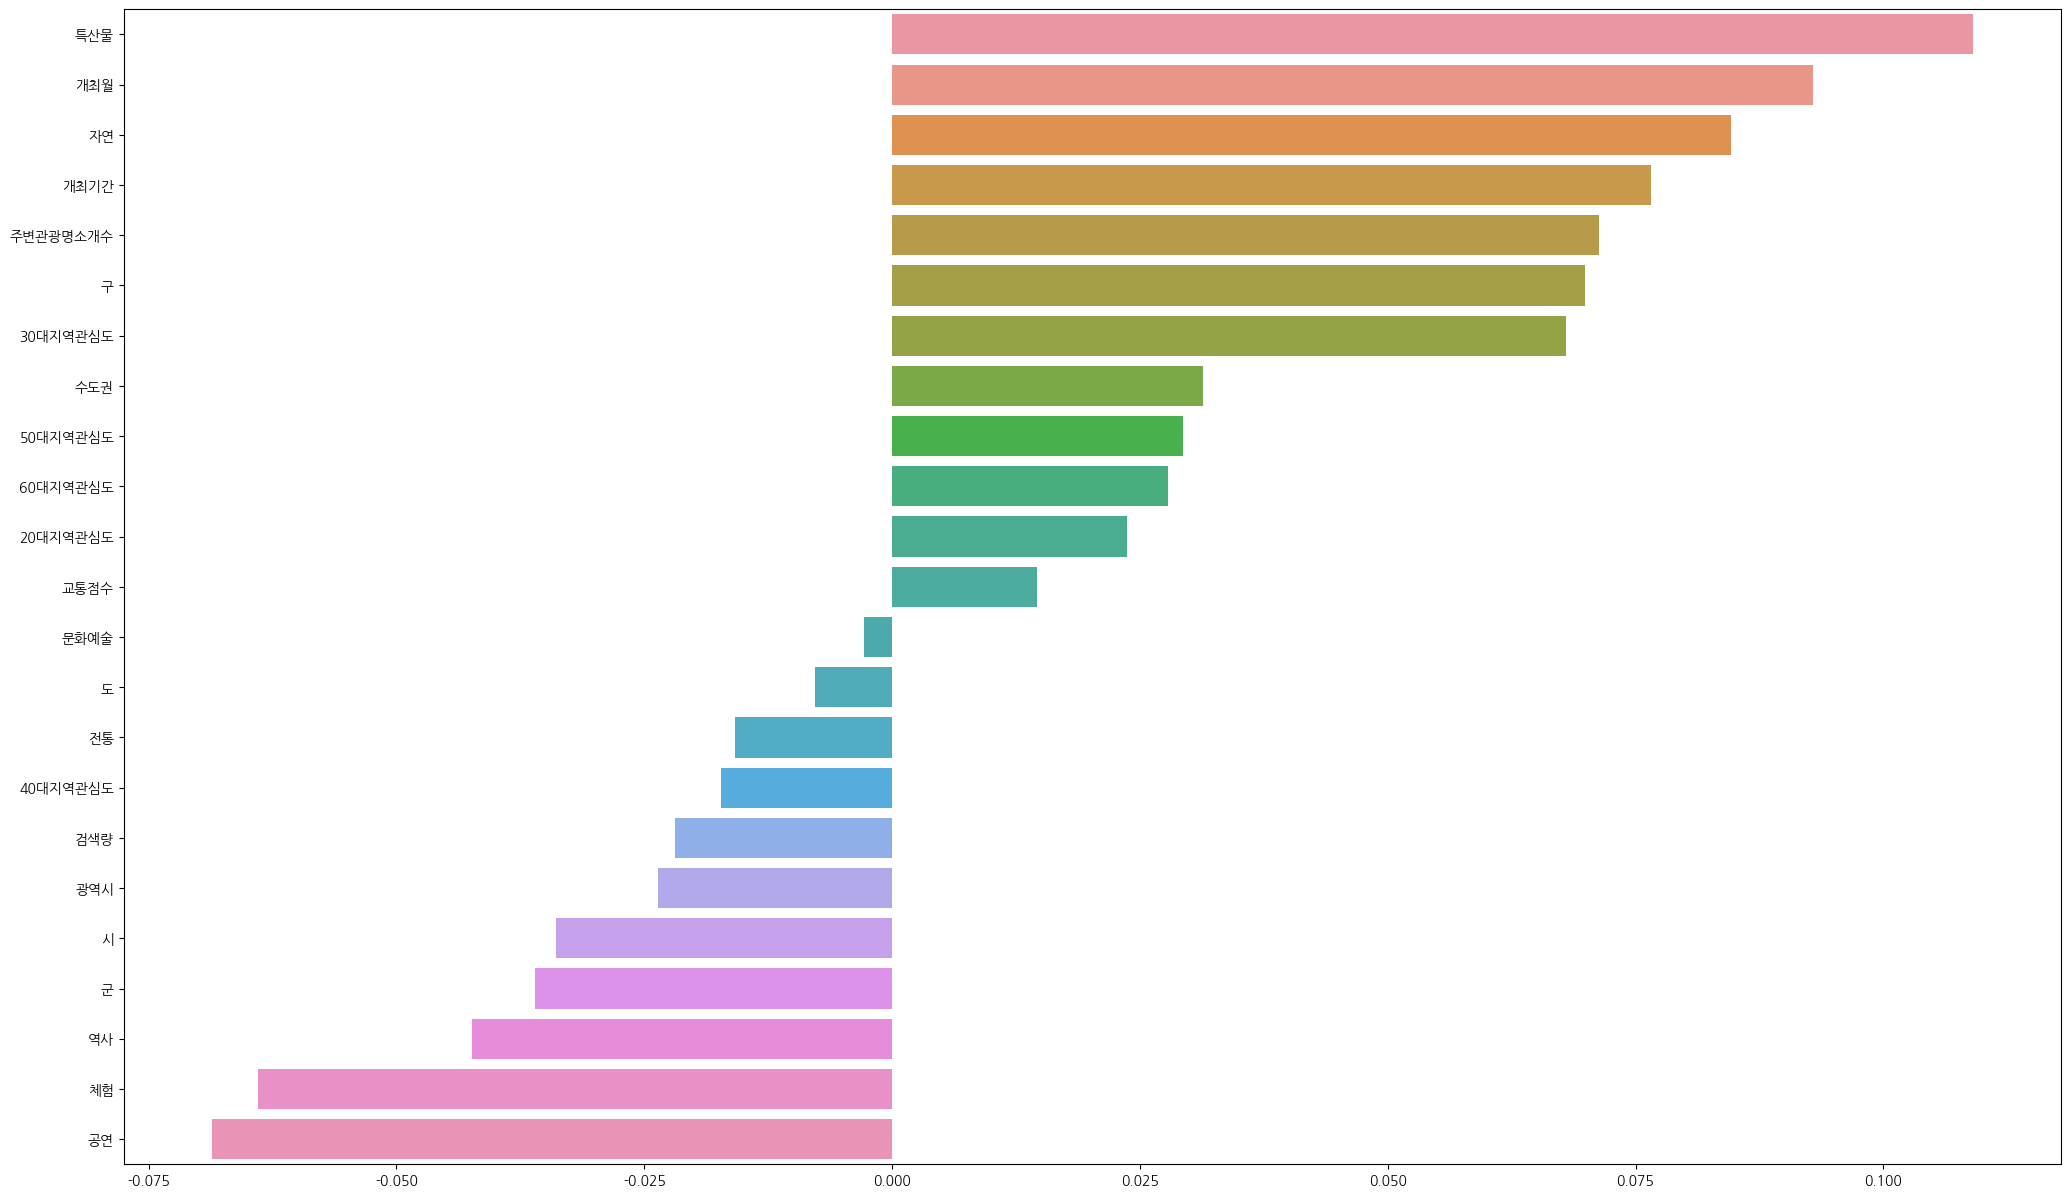

In [ ]:
# 각 feature의 회귀 계수 값 시각화 : Ridge
coef = pd.Series(ridge_reg.coef_[0], index=X.columns)
coef_sort = coef.sort_values(ascending=False)
plt.figure(figsize = (25,15))
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
ridge_fi = pd.DataFrame(zip(coef_sort.index, coef_sort.values), columns=['feature','importance'])
ridge_fi['importance'] = pd.DataFrame(ridge_fi['importance'] - ridge_fi['importance'].min())
ridge_fi['importance'] = ridge_fi['importance']/ridge_fi['importance'].max()
ridge_fi

,feature,importance
0,특산물,1.000000
1,개최월,0.909233
2,자연,0.862530
3,개최기간,0.817131
4,주변관광명소개수,0.787527
5,구,0.779625
6,30대지역관심도,0.768865
7,수도권,0.563017
8,50대지역관심도,0.551652
9,60대지역관심도,0.542678


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 5, random_state = 0)

dt_reg.fit(X_train_scaled, y_train_scaled)

y_train_hat_dt = dt_reg.predict(X_train_scaled)
y_test_hat_dt = dt_reg.predict(X_test_scaled)

evaluate_regr(y_train_scaled, y_train_hat_dt)
evaluate_regr(y_test_scaled, y_test_hat_dt)

RMSLE: 0.144, RMSE: 0.128, MSE: 0.063, R2 score: 0.063
RMSLE: 0.251, RMSE: 0.476, MSE: 0.175, R2 score: 0.175


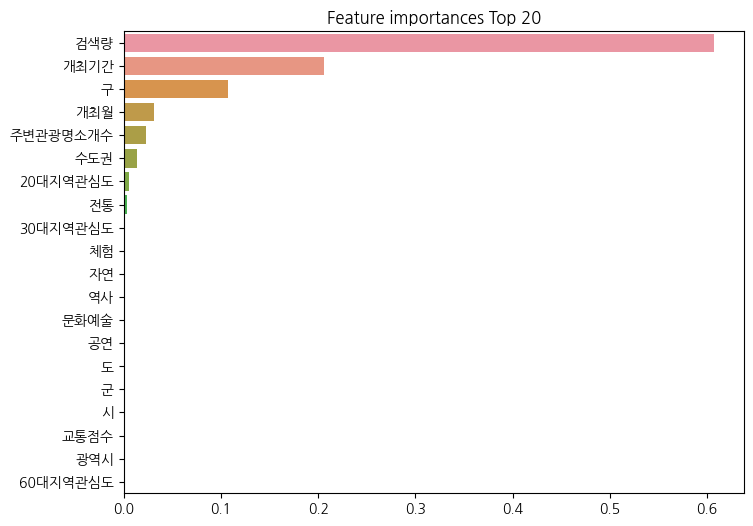

In [ ]:
# feature 중요도 체크

import seaborn as sns

ftr_importances_values = dt_reg.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
dt_fi = pd.DataFrame(zip(X_train.columns, ftr_importances_values), columns=['feature','importance'])
dt_fi['importance'] = (dt_fi['importance'] - dt_fi['importance'].min())/dt_fi['importance'].max()
dt_fi

,feature,importance
0,검색량,1.000000
1,교통점수,0.000000
2,개최월,0.052084
3,개최기간,0.339881
4,20대지역관심도,0.008898
5,30대지역관심도,0.002995
6,40대지역관심도,0.000000
7,50대지역관심도,0.000000
8,60대지역관심도,0.000000
9,수도권,0.022708


### RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(min_samples_leaf =3, random_state = 0)
rf_reg.fit(X_train_scaled, y_train_scaled)

y_train_hat_dt = rf_reg.predict(X_train_scaled)
y_test_hat_dt = rf_reg.predict(X_test_scaled)

evaluate_regr(y_train_scaled, y_train_hat_dt)
evaluate_regr(y_test_scaled, y_test_hat_dt)

RMSLE: 0.131, RMSE: 0.121, MSE: 0.063, R2 score: 0.063
RMSLE: 0.243, RMSE: 0.467, MSE: 0.171, R2 score: 0.171


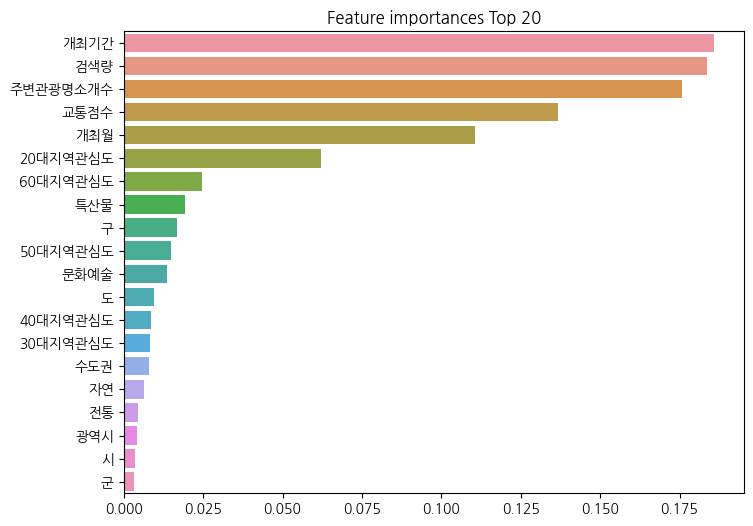

In [ ]:
# feature 중요도 체크

import seaborn as sns

ftr_importances_values = rf_reg.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
rf_fi = pd.DataFrame(zip(X_train.columns, ftr_importances_values), columns=['feature','importance'])
rf_fi['importance'] = (rf_fi['importance'] - rf_fi['importance'].min())/rf_fi['importance'].max()
rf_fi

,feature,importance
0,검색량,0.988114
1,교통점수,0.735881
2,개최월,0.594149
3,개최기간,1.000000
4,20대지역관심도,0.333619
5,30대지역관심도,0.045044
6,40대지역관심도,0.047028
7,50대지역관심도,0.080719
8,60대지역관심도,0.132015
9,수도권,0.042047


### catboost

In [ ]:
pip install catboost

In [ ]:
import catboost as cb
from catboost import CatBoostRegressor

In [ ]:
# dataset 분리
cat_features=['a','b','c']
train_dataset = cb.Pool(X_train, y_train)
test_dataset = cb.Pool(X_test, y_test)

In [ ]:
model = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'iterations': [100],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)
pred = model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('MSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

0:	learn: 517.3217951	test: 846.7444886	best: 846.7444886 (0)	total: 46.3ms	remaining: 4.58s
1:	learn: 513.4035582	test: 843.3366751	best: 843.3366751 (1)	total: 47.5ms	remaining: 2.33s
2:	learn: 509.6904227	test: 840.2202119	best: 840.2202119 (2)	total: 48ms	remaining: 1.55s
3:	learn: 505.3252447	test: 837.7028548	best: 837.7028548 (3)	total: 48.4ms	remaining: 1.16s
4:	learn: 501.7997589	test: 835.2581500	best: 835.2581500 (4)	total: 48.9ms	remaining: 928ms
5:	learn: 497.7241342	test: 832.3749345	best: 832.3749345 (5)	total: 49.3ms	remaining: 773ms
6:	learn: 494.6896429	test: 829.6477643	best: 829.6477643 (6)	total: 49.8ms	remaining: 661ms
7:	learn: 491.8237627	test: 827.3867165	best: 827.3867165 (7)	total: 50.2ms	remaining: 577ms
8:	learn: 488.6421326	test: 825.5980508	best: 825.5980508 (8)	total: 50.6ms	remaining: 512ms
9:	learn: 484.5923872	test: 823.5229910	best: 823.5229910 (9)	total: 51ms	remaining: 459ms
10:	learn: 480.5540290	test: 819.1135740	best: 819.1135740 (10)	total: 51.

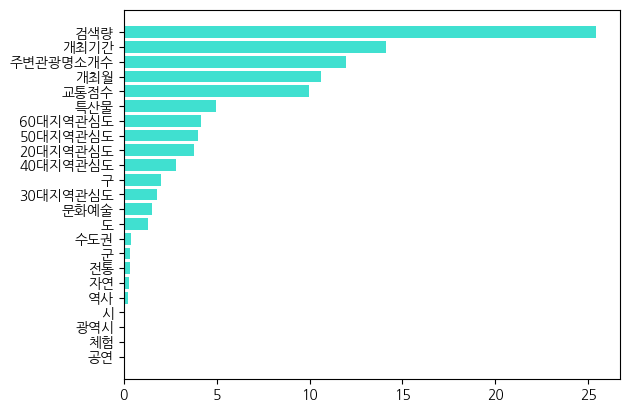

In [ ]:
# feature importance 확인
feature_importances = model.feature_importances_
columns = X.columns
sorted_indices = feature_importances.argsort()

sorted_columns = [columns[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.barh(sorted_columns, sorted_importances, color='turquoise')
plt.show()

In [ ]:
cat_fi = pd.DataFrame(zip(sorted_columns, sorted_importances), columns=['feature','importance'])
cat_fi['importance'] = (cat_fi['importance'] - cat_fi['importance'].min())/cat_fi['importance'].max()
cat_fi

,feature,importance
0,공연,0.000000
1,체험,0.000000
2,광역시,0.000000
3,시,0.000941
4,역사,0.008827
5,자연,0.010707
6,전통,0.012438
7,군,0.014071
8,수도권,0.014427
9,도,0.051709


## feature importance 병합

In [ ]:
# 정렬 및 합
lgbm_sorted = lgbm_fi.sort_values(by=['feature'])
xgb_sorted = xgb_fi.sort_values(by=['feature'])
linear_sorted = linear_fi.sort_values(by=['feature'])
ridge_sorted = ridge_fi.sort_values(by=['feature'])
dt_sorted = dt_fi.sort_values(by=['feature'])
rf_sorted = rf_fi.sort_values(by=['feature'])
cat_sorted = cat_fi.sort_values(by=['feature'])

In [ ]:
sorted = lgbm_sorted['importance'] + xgb_sorted['importance'] + linear_sorted['importance'] + ridge_sorted['importance'] + \
dt_sorted['importance'] + rf_sorted['importance'] + cat_sorted['importance']

In [ ]:
sorted_final = pd.DataFrame(zip(lgbm_sorted['feature'],lgbm_sorted['importance'], xgb_sorted['importance'], linear_sorted['importance'], ridge_sorted['importance'], dt_sorted['importance'], rf_sorted['importance'], cat_sorted['importance']),columns=['feature','lgbm','xgb','linear','ridge','dt','rf','cat'])
sorted_final

,feature,lgbm,xgb,linear,ridge,dt,rf,cat
0,20대지역관심도,0.193548,0.533416,0.204787,0.519617,0.008898,0.333619,0.149774
1,30대지역관심도,0.010753,0.020219,1.000000,0.768865,0.002995,0.045044,0.069486
2,40대지역관심도,0.032258,0.003020,0.064448,0.289076,0.000000,0.047028,0.111441
3,50대지역관심도,0.032258,0.000000,0.000000,0.551652,0.000000,0.080719,0.157673
4,60대지역관심도,0.000000,0.000874,0.851289,0.542678,0.000000,0.132015,0.162993
5,개최기간,0.182796,0.446968,0.515714,0.817131,0.339881,1.000000,0.556100
6,개최월,0.172043,0.754063,0.566184,0.909233,0.052084,0.594149,0.416906
7,검색량,1.000000,0.415429,0.373539,0.262709,1.000000,0.988114,1.000000
8,공연,0.000000,0.000196,0.260266,0.000000,0.000000,0.000000,0.000000
9,광역시,0.000000,0.078895,0.375304,0.253223,0.000000,0.023176,0.000000


#### 전체 합

In [ ]:
sorted = lgbm_sorted['importance'] + xgb_sorted['importance'] + linear_sorted['importance'] + ridge_sorted['importance'] + \
dt_sorted['importance'] + rf_sorted['importance'] + cat_sorted['importance']

final = pd.DataFrame(zip(lgbm_sorted['feature'], sorted), columns=['feature','importance'])
final_rank = final.sort_values(by=['importance'],ascending=False)
final_rank

,feature,importance
0,20대지역관심도,5.403543
3,50대지역관심도,3.359408
1,30대지역관심도,3.353345
2,40대지역관심도,3.011903
4,60대지역관심도,2.432020
15,수도권,2.262866
22,특산물,2.102369
5,개최기간,1.417801
6,개최월,1.379325
14,문화예술,1.282269


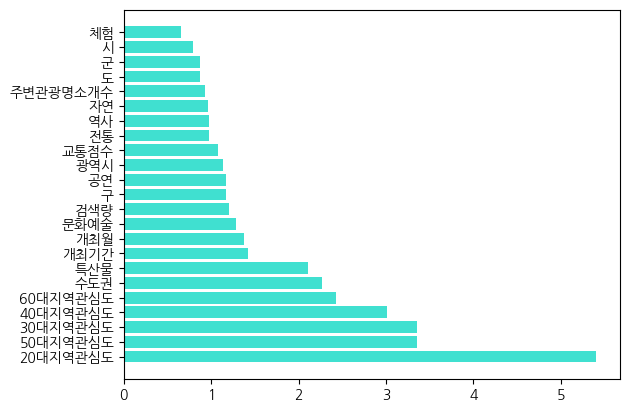

In [ ]:
plt.barh(final_rank['feature'], final_rank['importance'], color='turquoise')
plt.show()

#### 선별 합
: MSE 확인 후 linear/ridge 제거

In [ ]:
sorted = lgbm_sorted['importance'] + xgb_sorted['importance'] + dt_sorted['importance'] + rf_sorted['importance'] + cat_sorted['importance']
final = pd.DataFrame(zip(lgbm_sorted['feature'], sorted), columns=['feature','importance'])
final_rank = final.sort_values(by=['importance'])
final_rank

,feature,importance
5,개최기간,0.089718
6,개최월,0.094745
12,군,0.124567
7,검색량,0.127049
8,공연,0.147315
13,도,0.152976
10,교통점수,0.161008
16,시,0.163189
9,광역시,0.173629
11,구,0.315405


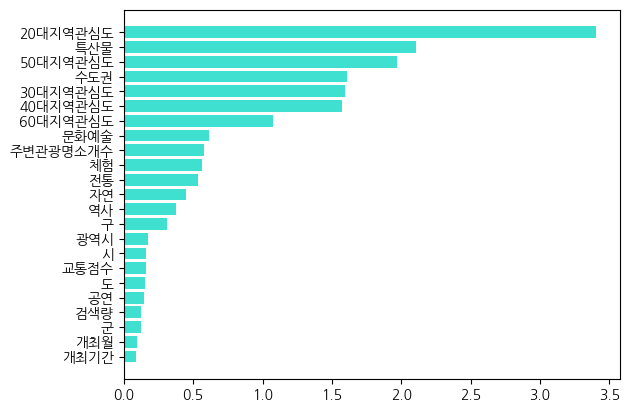

In [ ]:
plt.barh(final_rank['feature'], final_rank['importance'], color='turquoise')
plt.show()

# 클러스터링

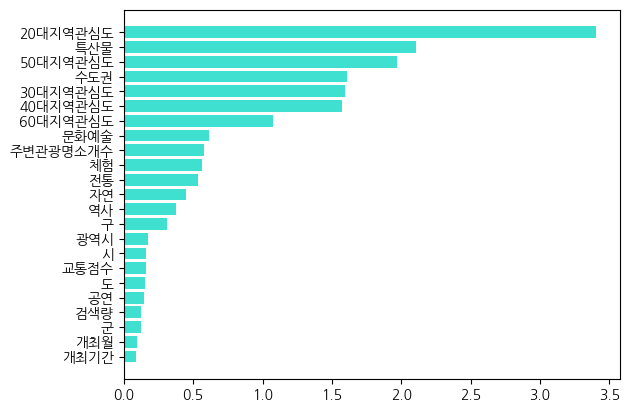

In [ ]:
plt.barh(final_rank['feature'], final_rank['importance'], color='turquoise')
plt.show()

In [ ]:
dfc = df[['축제명', '축제유형', '예산합계', '방문객_내국인',
       '20대지역관심도', '30대지역관심도', '40대지역관심도', '50대지역관심도',
       '60대지역관심도', '수도권', '구', '주변관광명소개수']]
dfc['일평균방문객'] = df['방문객_내국인'] / df['개최기간']
dfc['방문객/예산'] = dfc['방문객_내국인'] / dfc['예산합계']
dfc.set_index('축제명', drop=True, inplace=True)
dfc

,축제유형,예산합계,방문객_내국인,20대지역관심도,30대지역관심도,40대지역관심도,50대지역관심도,60대지역관심도,수도권,구,주변관광명소개수,일평균방문객,방문객/예산
축제명,,,,,,,,,,,,,
종로한복축제,전통,100,157541,3.428250,3.137164,3.003710,2.954626,2.958789,1,1,325,78770.500000,1575.410000
구로G페스티벌,공연,868,100000,3.428250,3.137164,3.003710,2.954626,2.958789,1,1,58,33333.333333,115.207373
한성백제문화제,역사,1967,249000,3.428250,3.137164,3.003710,2.954626,2.958789,1,1,90,83000.000000,126.588714
4.19혁명국민문화제,역사,770,57000,3.428250,3.137164,3.003710,2.954626,2.958789,1,1,79,4750.000000,74.025974
서울장미축제,자연,600,730000,3.428250,3.137164,3.003710,2.954626,2.958789,1,1,51,34761.904762,1216.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
천령문화제,전통,500,25000,3.038432,2.939728,2.911292,2.972592,2.981110,0,0,315,5000.000000,50.000000
합천바캉스축제,체험,260,51212,3.038432,2.939728,2.911292,2.972592,2.981110,0,0,409,6401.500000,196.969231
대야문화제,체험,610,30000,3.038432,2.939728,2.911292,2.972592,2.981110,0,0,409,10000.000000,49.180328


In [ ]:
d = pd.get_dummies(dfc)
d.drop(columns='축제유형_공연', inplace=True)
d

,예산합계,방문객_내국인,20대지역관심도,30대지역관심도,40대지역관심도,50대지역관심도,60대지역관심도,수도권,구,주변관광명소개수,일평균방문객,방문객/예산,축제유형_문화예술,축제유형_역사,축제유형_자연,축제유형_전통,축제유형_체험,축제유형_특산물
축제명,,,,,,,,,,,,,,,,,,
종로한복축제,100,157541,3.428250,3.137164,3.003710,2.954626,2.958789,1,1,325,78770.500000,1575.410000,0,0,0,1,0,0
구로G페스티벌,868,100000,3.428250,3.137164,3.003710,2.954626,2.958789,1,1,58,33333.333333,115.207373,0,0,0,0,0,0
한성백제문화제,1967,249000,3.428250,3.137164,3.003710,2.954626,2.958789,1,1,90,83000.000000,126.588714,0,1,0,0,0,0
4.19혁명국민문화제,770,57000,3.428250,3.137164,3.003710,2.954626,2.958789,1,1,79,4750.000000,74.025974,0,1,0,0,0,0
서울장미축제,600,730000,3.428250,3.137164,3.003710,2.954626,2.958789,1,1,51,34761.904762,1216.666667,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
천령문화제,500,25000,3.038432,2.939728,2.911292,2.972592,2.981110,0,0,315,5000.000000,50.000000,0,0,0,1,0,0
합천바캉스축제,260,51212,3.038432,2.939728,2.911292,2.972592,2.981110,0,0,409,6401.500000,196.969231,0,0,0,0,1,0
대야문화제,610,30000,3.038432,2.939728,2.911292,2.972592,2.981110,0,0,409,10000.000000,49.180328,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
dsc = sc.fit_transform(d)

## 병합군집

In [ ]:
pip install yellowbrick

KElbowVisualizer(ax=<Axes: >,
                 estimator=AgglomerativeClustering(affinity='euclidean',
                                                   n_clusters=11),
                 k=(2, 12))

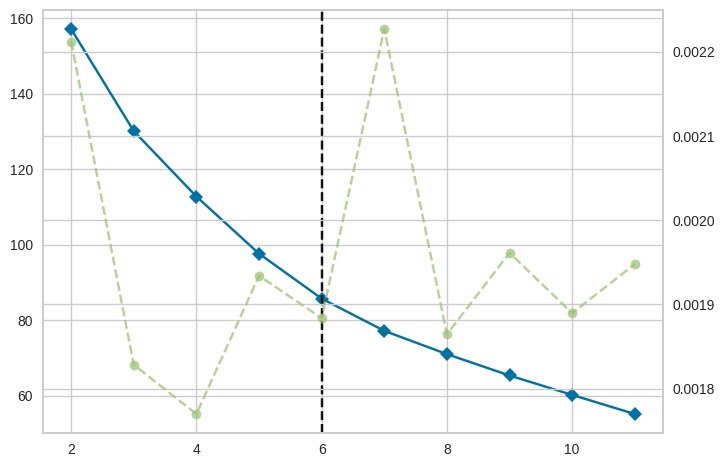

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer



hc = AgglomerativeClustering(affinity='euclidean', linkage='ward')
visualizer = KElbowVisualizer(hc, k=(2, 12),random_state=560)
visualizer.fit(dsc)

## KMeans

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11, random_state=60),
                 k=(2, 12))

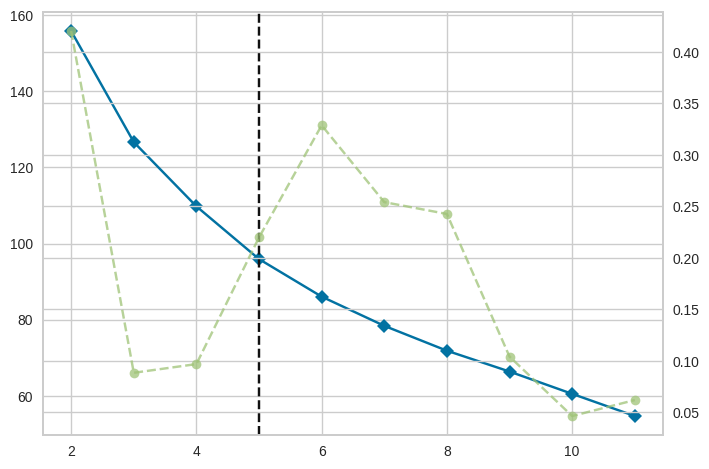

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=60)
visualizer = KElbowVisualizer(km, k=(2, 12),random_state=2023)
visualizer.fit(dsc)

## KMedoids

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.1 MB/s eta 0:00:00


KElbowVisualizer(ax=<Axes: >, estimator=KMedoids(n_clusters=11), k=(2, 12))

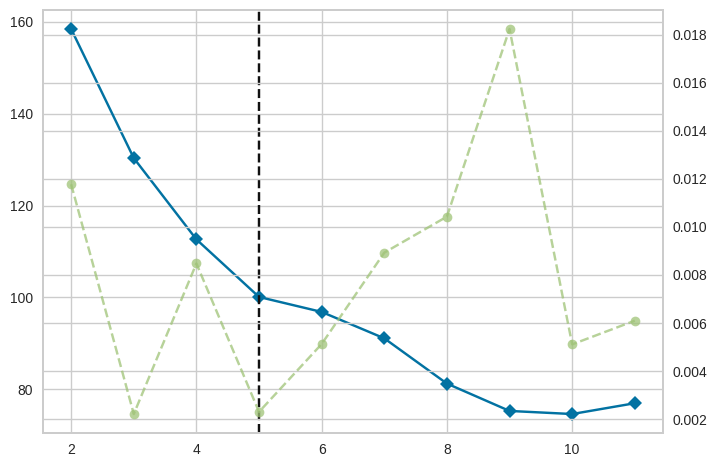

In [ ]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer

pam = KMedoids()
visualizer = KElbowVisualizer(pam, k=(2, 12), random_state=2023)
visualizer.fit(dsc)

In [ ]:
from sklearn_extra.cluster import KMedoids
from scipy.stats import mode

pam = KMedoids(n_clusters=5, random_state=42)
pam.fit(dsc)
kmed_clst = pam.labels_

In [ ]:
dscdf = pd.DataFrame(dsc, columns = d.columns, index = d.index)

In [ ]:
#스케일링하지 않은 원본 데이터에 군집화 결과 추가
ddf = pd.DataFrame(d, columns = d.columns, index = d.index)
clst2 = ddf.copy()
clst2['kmed'] = kmed_clst
clst2['kmed'].value_counts()

1    29
4    26
0    25
3    24
2    18
Name: kmed, dtype: int64

In [ ]:
clst2.groupby('kmed').mean().iloc[:, :10]
# kmed = 군집

,예산합계,방문객_내국인,20대지역관심도,30대지역관심도,40대지역관심도,50대지역관심도,60대지역관심도,수도권,구,주변관광명소개수
kmed,,,,,,,,,,
0,1071.640000,137989.120000,3.198947,3.001151,2.995954,2.974768,2.997729,0.800000,0.240000,136.160000
1,654.724138,114080.862069,3.445716,3.573026,3.592145,3.527205,3.533044,0.000000,0.172414,196.379310
2,817.333333,183733.444444,3.067545,2.963270,3.000718,2.975087,3.001923,0.277778,0.111111,175.111111
3,855.708333,166538.666667,3.148503,3.046050,3.010562,3.003205,3.012222,0.000000,0.875000,130.833333
4,1652.269231,199036.423077,3.109056,2.979206,2.971583,2.985929,2.998503,0.269231,0.307692,225.346154


In [ ]:
clst2.groupby('kmed').mean().iloc[:, 10:]
# kmed = 군집

,일평균방문객,방문객/예산,축제유형_문화예술,축제유형_역사,축제유형_자연,축제유형_전통,축제유형_체험,축제유형_특산물
kmed,,,,,,,,
0,35926.171064,170.988744,0.560000,0.200000,0.040000,0.000000,0.120000,0.000000
1,24783.031201,600.688073,0.137931,0.103448,0.068966,0.241379,0.206897,0.137931
2,51124.030864,367.797503,0.000000,0.055556,0.000000,0.000000,0.000000,0.944444
3,77264.497150,350.975407,0.958333,0.000000,0.041667,0.000000,0.000000,0.000000
4,39387.248601,226.828114,0.000000,0.038462,0.038462,0.846154,0.076923,0.000000


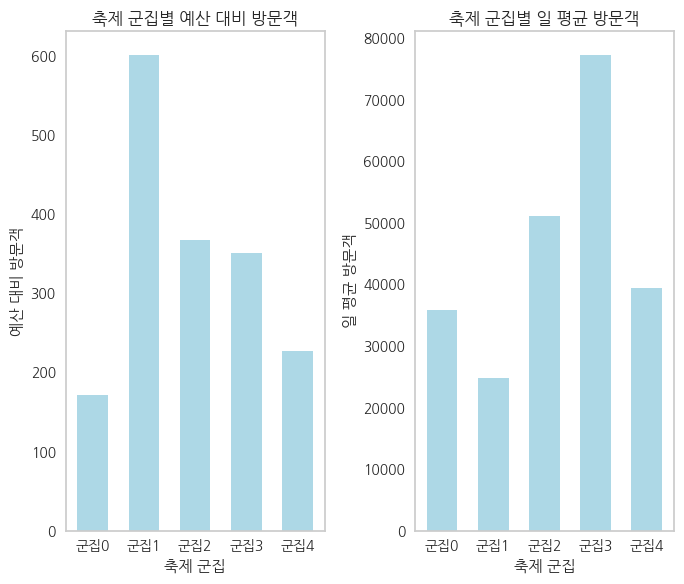

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='NanumGothic')

xlab = ['군집0', '군집1', '군집2', '군집3', '군집4']

plt.figure(figsize=(7,6))

plt.subplot(1,2,1)
plt.bar(x=xlab, height=clst2.groupby('kmed').mean()['방문객/예산'],
        color='lightblue', width=0.6)
plt.xlabel('축제 군집')
plt.ylabel('예산 대비 방문객')
plt.title('축제 군집별 예산 대비 방문객')
plt.grid(False)

plt.subplot(1,2,2)
plt.bar(x=xlab, height=clst2.groupby('kmed').mean()['일평균방문객'],
        color='lightblue', width=0.6)
plt.xlabel('축제 군집')
plt.ylabel('일 평균 방문객')
plt.title('축제 군집별 일 평균 방문객')
plt.grid(False)

plt.tight_layout()
plt.show()

## 결과 해석

### 성공 축제

#### 군집 1

In [ ]:
clst2[clst2['kmed']==1].index
#일평균방문객 하위권
#예산 대비 방문객 압도적 1등

Index(['조선통신사축제', '부산국제록페스티벌', '해운대북극곰축제', '동래읍성역사축제', '연제고분판타지축제', '춘천마임축제',
       '춘천인형극제', '소양강문화제', '원주한지문화제', '원주다이내믹댄싱카니발', '강릉단오제', '강릉커피축제',
       '동해무릉제', '한강낙동강발원지축제', '횡성한우축제', '단종문화제', '동강국제사진제', '김삿갓문화제',
       '평창더위사냥축제', '평창효석문화제', '평창백일홍축제', '평창송어축제', '함백산야생화축제', '정선아리랑제',
       '고성군민의날및수성문화제', '양양송이축제', '양양연어축제', '월대천축제', '이호테우축제'],
      dtype='object', name='축제명')

In [ ]:
df.loc[df['축제명'].isin(list(clst2[clst2['kmed']==1].index)), '광역단체명'].value_counts().to_frame()
#강원도/부산/제주 = 수도권 이외 여행지역으로서 선호도가 높은 곳, 주요 국내 관광지
#위 지역에서 개최되는 축제들은 예산 대비 방문객이 비교적 높은 편

,광역단체명
강원,22
부산,5
제주,2


In [ ]:
df.loc[df['축제명'].isin(list(clst2[clst2['kmed']==1].index)), '축제유형'].value_counts().to_frame()
#군집 내 축제 유형에 따른 유의미한 차이는 없음 (지역 특성이 강한 군집)

,축제유형
전통,7
체험,6
문화예술,4
특산물,4
역사,3
공연,3
자연,2


#### 군집 2

In [ ]:
clst2[clst2['kmed']==2].index
#예산 대비 방문객도 2위, 일평균 방문객도 2위

Index(['부산자갈치축제', '소래포구축제', '파주개성인삼축제', '파주장단콩축제', '이천인삼축제', '햇사레장호원복숭아축제',
       '여주오곡나루축제', '한산모시문화제', '군산시간여행축제', '진안홍삼축제', '장수한우랑사과랑축제', '임실N치즈축제',
       '순창장류축제', '청송사과축제', '봉화은어축제', '사천시농업한마당축제', '배내골사과축제', '산청한방약초축제'],
      dtype='object', name='축제명')

In [ ]:
df.loc[df['축제명'].isin(list(clst2[clst2['kmed']==2].index)), '광역단체명'].value_counts().to_frame()
#지역에 따른 유의미한 차이는 없으나, 수도권이 없음

,광역단체명
경기,5
전북,5
경남,3
경북,2
부산,1
인천,1
충남,1


In [ ]:
df.loc[df['축제명'].isin(list(clst2[clst2['kmed']==2].index)), '축제유형'].value_counts().to_frame()
#특산물

,축제유형
특산물,17
역사,1


#### 군집 3

In [ ]:
clst2[clst2['kmed']==3].index
#예산 대비 방문객 3위, 일평균방문객 1위

Index(['부산항축제', '사상강변축제', '부산바다축제', '부산불꽃축제', '낙동강구포나루축제', '금정산성축제',
       '대구포크페스티벌', '대구치맥페스티벌', '희망달서큰잔치', '대구국제재즈축제', '수성못페스티벌', '대구국제뮤지컬페스티벌',
       '대구국제오페라축제', '금호강바람소리길축제', '동성로축제', '봉산미술제', '인천개항장문화재야행', '주안미디어문화축제',
       '광주프린지페스티벌', '대전서구힐링아트페스티벌', '대청호벚꽃축제', '포항국제불빛축제', '김해분청도자기축제',
       '독일마을맥주축제'],
      dtype='object', name='축제명')

In [ ]:
df.loc[df['축제명'].isin(list(clst2[clst2['kmed']==3].index)), '광역단체명'].value_counts().to_frame()
#주로 광역시에서 개최되는 축제, 수도권 없음

,광역단체명
대구,10
부산,6
인천,2
대전,2
경남,2
광주,1
경북,1


In [ ]:
df.loc[df['축제명'].isin(list(clst2[clst2['kmed']==3].index)), '축제유형'].value_counts().to_frame()
#문화예술(공연, 전시, 예술 등 융복합적 테마) 주제의 축제가 대부분

,축제유형
문화예술,23
자연,1


### 실패축제

#### 군집 0

In [ ]:
clst2[clst2['kmed']==0].index
#예산 대비 방문객 5등, 일평균 방문객 4등
#각 축제의 정체성이 모호한 경우가 있음 (축제 이름에서 명확한 축제의 테마 및 구성 파악 어려움)

Index(['구로G페스티벌', '한성백제문화제', '4.19혁명국민문화제', '서울장미축제', '용마폭포문화예술축제', '도봉구등축제',
       '수원화성문화제', '고양행주문화제', '고양호수예술축제', '포은문화제', '부천국제만화축제', '부천국제애니메이션페스티벌',
       '안양시민축제', '화성뱃놀이축제', '의정부음악극축제', '블랙뮤직페스티벌', '시흥갯골축제', '설봉산별빛축제',
       '과천축제', '연천구석기축제', '전주국제영화제', '산타축제', '목포항구축제', '코리아드라마페스티벌',
       '통영한산대첩축제'],
      dtype='object', name='축제명')

In [ ]:
df.loc[df['축제명'].isin(list(clst2[clst2['kmed']==0].index)), '광역단체명'].value_counts().to_frame()
#수도권 구성비가 높음

,광역단체명
경기,14
서울,6
전북,2
경남,2
전남,1


In [ ]:
df.loc[df['축제명'].isin(list(clst2[clst2['kmed']==0].index)), '축제유형'].value_counts().to_frame()

,축제유형
문화예술,14
역사,5
체험,3
공연,2
자연,1


#### 군집 4

In [ ]:
clst2[clst2['kmed']==4].index
#예산 대비 방문객 4등, 일평균 방문객 3등

Index(['종로한복축제', '노원탈축제', '광안리어방축제', '대구약령시한방문화축제', '계양산국악제', '부평풍물대축제',
       '광주세계김치축제', '고싸움놀이축제', '울산옹기축제', '안산김홍도축제', '율곡문화제', '오리문화제',
       '오산독산성문화제', '안성맞춤남사당바우덕이축제', '음성품바축제', '서산해미읍성축제', '진주논개제', '진주남강유등축제',
       '개천예술제', '밀양아리랑대축제', '거제섬꽃축제', '양산삽량문화축전', '남명선비문화축제', '천령문화제',
       '합천바캉스축제', '대야문화제'],
      dtype='object', name='축제명')

In [ ]:
df.loc[df['축제명'].isin(list(clst2[clst2['kmed']==4].index)), '광역단체명'].value_counts().to_frame()
#군집0보다 수도권 구성비는 낮은 편

,광역단체명
경남,10
경기,5
서울,2
인천,2
광주,2
부산,1
대구,1
울산,1
충북,1
충남,1


In [ ]:
df.loc[df['축제명'].isin(list(clst2[clst2['kmed']==4].index)), '축제유형'].value_counts().to_frame()
#전통 관련 축제가 예산 대비 성과가 비교적 저조한 편

,축제유형
전통,22
체험,2
역사,1
자연,1


# 프로파일링

In [ ]:
lab=pd.read_excel('/content/drive/MyDrive/시계열팀 문화데이터 공모전/수집 데이터 공유/데이터랩21개 데이터_수정.xlsx')

### 군집 0

In [ ]:
lab[lab['축제명'].isin(['수원화성문화제', '연천구석기축제', '시흥갯골축제'])][['식음료업','여가서비스업','쇼핑업','숙박업']].mean().to_frame()

,0
식음료업,265780.000000
여가서비스업,31730.666667
쇼핑업,403819.333333
숙박업,23811.666667


### 군집 1

In [ ]:
lab[lab['축제명'].isin(['춘천마임축제', '원주다이내믹댄싱카니발', '강릉커피축제', '횡성한우축제'])][['식음료업','여가서비스업','쇼핑업','숙박업']].mean().to_frame()

,0
식음료업,318479.75
여가서비스업,98561.25
쇼핑업,69921.50
숙박업,35286.25


### 군집 2

In [ ]:
lab[lab['축제명'].isin(['여주오곡나루축제', '한산모시문화제', '진안홍삼축제', '임실N치즈축제', '순창장류축제', '봉화은어축제', '산청한방약초축제'])][['식음료업','여가서비스업','쇼핑업','숙박업']].mean().to_frame()

,0
식음료업,52275.333333
여가서비스업,56689.333333
쇼핑업,152932.333333
숙박업,1378.500000


### 군집 3

In [ ]:
lab[lab['축제명'].isin(['대구치맥페스티벌', '인천펜타포트음악축제'])][['식음료업','여가서비스업','쇼핑업','숙박업']].mean().to_frame()

,0
식음료업,460926.0
여가서비스업,28956.5
쇼핑업,315041.0
숙박업,31535.5


### 군집 4

In [ ]:
lab[lab['축제명'].isin(['울산옹기축제', '안산바우덕이축제', '음성품바축제', '밀양아리랑대축제'])][['식음료업','여가서비스업','쇼핑업','숙박업']].mean().to_frame()

,0
식음료업,78684.5
여가서비스업,59479.5
쇼핑업,3026.0
숙박업,3164.5


## 순위

### 군집 0

In [ ]:
lab[lab['축제명'].isin(['수원화성문화제', '연천구석기축제', '시흥갯골축제'])][['순위_식음료','순위_여가서비스업','순위_쇼핑업','순위_숙박업']].mean().to_frame()

,0
순위_식음료,1.333333
순위_여가서비스업,3.333333
순위_쇼핑업,2.333333
순위_숙박업,3.000000


### 군집 1

In [ ]:
lab[lab['축제명'].isin(['춘천마임축제', '원주다이내믹댄싱카니발', '강릉커피축제', '횡성한우축제'])][['순위_식음료','순위_여가서비스업','순위_쇼핑업','순위_숙박업']].mean().to_frame()
#20대 다수

,0
순위_식음료,1.00
순위_여가서비스업,2.75
순위_쇼핑업,3.25
순위_숙박업,3.00


In [ ]:
# 20대 다수
lab[lab['축제명'].isin(['춘천마임축제', '원주다이내믹댄싱카니발'])][['순위_식음료','순위_여가서비스업','순위_쇼핑업','순위_숙박업']].mean().to_frame()

,0
순위_식음료,1.0
순위_여가서비스업,2.5
순위_쇼핑업,3.0
순위_숙박업,3.5


In [ ]:
# 50대 다수
lab[lab['축제명'].isin(['강릉커피축제', '횡성한우축제'])][['순위_식음료','순위_여가서비스업','순위_쇼핑업','순위_숙박업']].mean().to_frame()

,0
순위_식음료,1.0
순위_여가서비스업,3.0
순위_쇼핑업,3.5
순위_숙박업,2.5


### 군집 2

In [ ]:
lab[lab['축제명'].isin(['여주오곡나루축제', '한산모시문화제', '진안홍삼축제', '임실N치즈축제', '순창장류축제', '봉화은어축제', '산청한방약초축제'])][['순위_식음료','순위_여가서비스업','순위_쇼핑업','순위_숙박업']].mean().to_frame()

,0
순위_식음료,1.333333
순위_여가서비스업,2.500000
순위_쇼핑업,3.166667
순위_숙박업,3.000000


### 군집 3

In [ ]:
lab[lab['축제명'].isin(['대구치맥페스티벌', '인천펜타포트음악축제'])][['순위_식음료','순위_여가서비스업','순위_쇼핑업','순위_숙박업']].mean().to_frame()

,0
순위_식음료,1.0
순위_여가서비스업,3.5
순위_쇼핑업,2.0
순위_숙박업,3.5


### 군집 4

In [ ]:
# 대구약령시한방문화축제
lab[lab['축제명'].isin(['울산옹기축제', '안산바우덕이축제', '음성품바축제', '밀양아리랑대축제'])][['순위_식음료','순위_여가서비스업','순위_쇼핑업','순위_숙박업']].mean().to_frame()

,0
순위_식음료,1.0
순위_여가서비스업,2.0
순위_쇼핑업,3.5
순위_숙박업,3.5


## 프로파일링 시각화

In [ ]:
mpl.rc('axes', unicode_minus=False)

In [ ]:
lab

,축제명,축제기간 외부방문자 유입,축제기간 현지인방문자 유입,축제기간 내비게이션 검색량,축제기간 관광소비,축제기간 축제지 집중률,비축제기간 외부방문자 유입,비축제기간 현지인방문자 유입,비축제기간 내비게이션 검색량,비축제기간 관광소비,...,식음료업,여가서비스업,쇼핑업,숙박업,순위_식음료,순위_여가서비스업,순위_쇼핑업,순위_숙박업,Unnamed: 55,축제명.1
0,여주오곡나루축제,0.843288,0.968593,0.809825,0.818846,0.885266,0.531122,0.783409,0.563797,0.773819,...,176194,300976,915726,5938,3,2,1,4,NaN,여주오곡나루축제
1,연천구석기축제,0.614825,0.869180,0.612079,0.748287,0.897188,0.534740,0.837996,0.366482,0.729220,...,68566,20233,1879,2040,1,2,4,3,NaN,연천구석기축제
2,울산옹기축제,0.811379,0.913854,0.645491,0.776691,0.843624,0.486195,0.832267,0.167275,0.732924,...,17524,4087,1355,547,1,2,3,4,NaN,울산옹기축제
3,원주다이내믹댄싱카니발,0.839207,0.815851,0.810967,0.704801,0.917815,0.363092,0.365036,0.261845,0.698774,...,339732,101325,135511,15686,1,3,2,4,NaN,원주다이내믹댄싱카니발
4,음성품바축제,0.664894,0.915618,0.581887,0.765904,0.802787,0.271218,0.703988,0.159075,0.741771,...,139845,114872,4697,5782,1,2,4,3,NaN,음성품바축제
5,인천펜타포트음악축제,0.759324,0.742393,0.534970,0.682659,0.990570,0.433949,0.800662,0.528444,0.721118,...,528921,35133,450740,51666,1,4,2,3,NaN,인천펜타포트음악축제
6,임실N치즈축제,0.784379,0.780936,0.733577,0.825484,0.911253,0.131400,0.199415,0.052996,0.641356,...,56872,17576,1268,223,1,2,3,4,NaN,임실N치즈축제
7,진안홍삼축제,0.605891,0.824705,0.666292,0.761795,0.905060,0.352579,0.707320,0.171594,0.663881,...,32829,13783,434,1082,1,2,4,3,NaN,진안홍삼축제
8,한산모시축제,0.811185,0.791321,0.786686,0.527210,0.866498,0.177597,0.217456,0.096392,0.532424,...,62963,4764,1265,3577,1,2,4,3,NaN,한산모시축제
9,횡성한우축제,0.665194,0.837603,0.581731,0.718344,0.866954,0.291325,0.667997,0.200394,0.572454,...,6419,4588,87,1073,1,2,4,3,NaN,횡성한우축제


In [ ]:
lab_=pd.read_excel('/content/drive/MyDrive/시계열팀 문화데이터 공모전/수집 데이터 공유/데이터랩21개데이터_소비총합추가.xlsx')

In [ ]:
lab_['식음료비율'] = lab_['식음료업']/lab_['소비총합']

In [ ]:
# 군집0
c0 = lab_[lab_['축제명'].isin(['수원화성문화제', '연천구석기축제', '시흥갯골축제'])]

# 군집1
c1 = lab_[lab_['축제명'].isin(['춘천마임축제', '원주다이내믹댄싱카니발', '강릉커피축제', '횡성한우축제'])]

# 군집2
c2 = lab_[lab_['축제명'].isin(['여주오곡나루축제', '한산모시문화제', '진안홍삼축제', '임실N치즈축제', '순창장류축제', '봉화은어축제', '산청한방약초축제'])]

# 군집3
c3 = lab_[lab_['축제명'].isin(['대구치맥페스티벌', '인천펜타포트음악축제'])]

# 군집4
c4 = lab_[lab_['축제명'].isin(['대구약령시한방문화축제','울산옹기축제', '안산바우덕이축제', '음성품바축제', '밀양아리랑대축제'])]

## 비축제기간 대비 축제기간 주요지표
- 외부방문자 유입
- 현지인방문자 유입
- 내비게이션 검색량
- 축제지 집중률

--> 위 데이터들의 군집별 평균

In [ ]:
m0 = c0[['외부방문자','현지인방문자 유입','내비게이션 검색량','관광소비','축제지 집중률']].mean().mean()
m1 = c1[['외부방문자','현지인방문자 유입','내비게이션 검색량','관광소비','축제지 집중률']].mean().mean()
m2 = c2[['외부방문자','현지인방문자 유입','내비게이션 검색량','관광소비','축제지 집중률']].mean().mean()
m3 = c3[['외부방문자','현지인방문자 유입','내비게이션 검색량','관광소비','축제지 집중률']].mean().mean()
m4 = c4[['외부방문자','현지인방문자 유입','내비게이션 검색량','관광소비','축제지 집중률']].mean().mean()

Text(0.5, 1.0, '비축제기간 대비 축제기간 주요지표 비율')

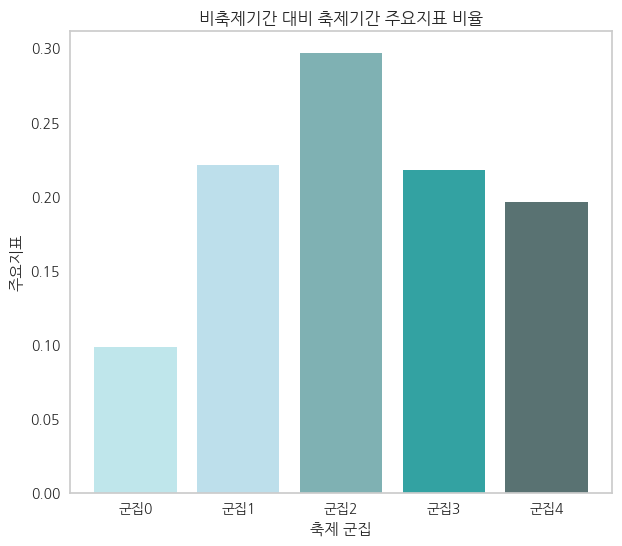

In [ ]:
import matplotlib.pyplot as plt

xlab = ['군집0', '군집1', '군집2', '군집3', '군집4']
m = [m0, m1, m2, m3, m4]

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=m,
        color=['powderblue','lightblue','cadetblue', 'darkcyan','darkslategray'], width=0.8, alpha = 0.8)
plt.xlabel('축제 군집')
plt.ylabel('주요지표')
plt.grid(False)
plt.title('비축제기간 대비 축제기간 주요지표 비율')

### 군집별 연령대 비율

#### 군집 0

10대미만     1.186667
10대       4.383333
20대      17.136667
30대      18.160000
40대      17.990000
50대      20.556667
60대      15.600000
70대이상     4.996667
dtype: float64


Text(0.5, 1.0, '성공 군집1 : 나이대별 비율')

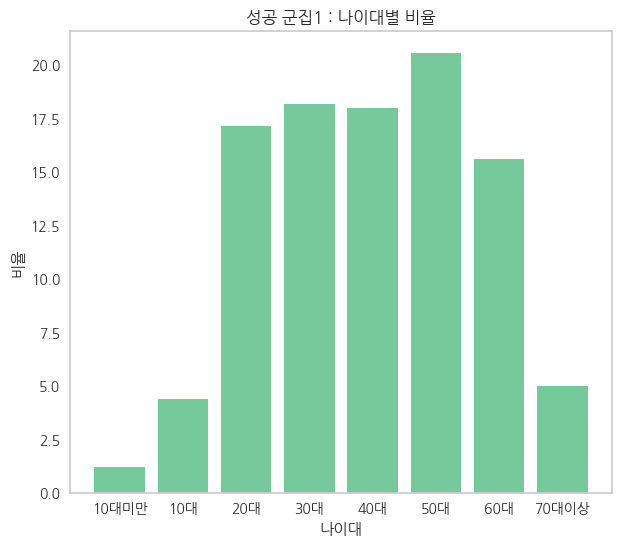

In [ ]:
a0 = c0[['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대이상']].mean()
print(a0)

xlab = ['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대이상']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=a0,
        color='mediumseagreen', width=0.8, alpha = 0.7)
plt.xlabel('나이대')
plt.ylabel('비율')
plt.grid(False)
plt.title('성공 군집1 : 나이대별 비율')

#### 군집 1

10대미만     1.3525
10대       5.7650
20대      19.0175
30대      17.1825
40대      15.1975
50대      19.7150
60대      16.3775
70대이상     5.3925
dtype: float64


Text(0.5, 1.0, '성공 군집1 : 나이대별 비율')

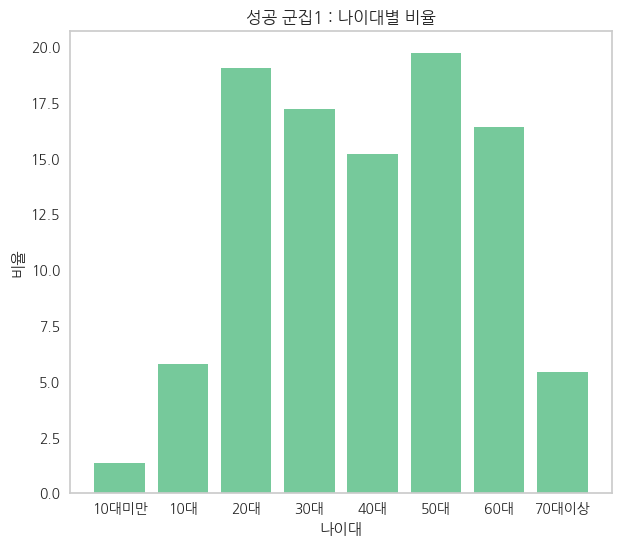

In [ ]:
a1 = c1[['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대이상']].mean()
print(a1)

xlab = ['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대이상']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=a1,
        color='mediumseagreen', width=0.8, alpha = 0.7)
plt.xlabel('나이대')
plt.ylabel('비율')
plt.grid(False)
plt.title('성공 군집1 : 나이대별 비율')

#### 군집 2

10대미만     1.373333
10대       4.643333
20대      10.153333
30대      12.768333
40대      17.010000
50대      25.875000
60대      21.118333
70대이상     7.065000
dtype: float64


Text(0.5, 1.0, '성공 군집2 : 나이대별 비율')

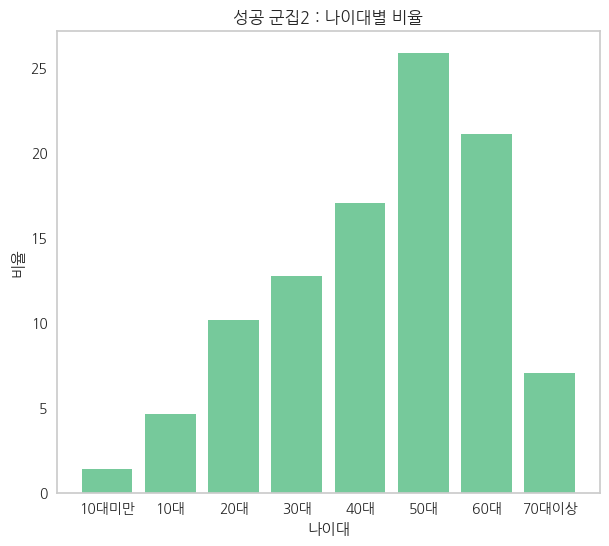

In [ ]:
a2 = c2[['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대이상']].mean()
print(a2)

xlab = ['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대이상']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=a2,
        color='mediumseagreen', width=0.8, alpha = 0.7)
plt.xlabel('나이대')
plt.ylabel('비율')
plt.grid(False)
plt.title('성공 군집2 : 나이대별 비율')

#### 군집 3

10대미만     0.450
10대       6.150
20대      34.390
30대      20.215
40대      12.690
50대      12.625
60대       9.860
70대이상     3.615
dtype: float64


Text(0.5, 1.0, '성공 군집3 : 나이대별 비율')

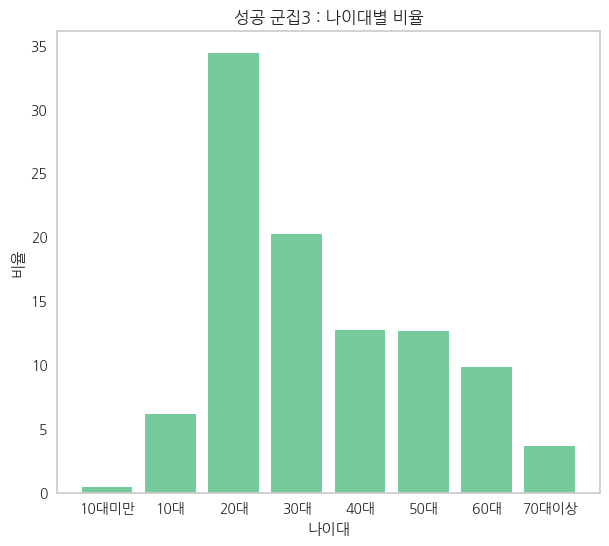

In [ ]:
a3 = c3[['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대이상']].mean()
print(a3)

xlab = ['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대이상']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=a3,
        color='mediumseagreen', width=0.8, alpha = 0.7)
plt.xlabel('나이대')
plt.ylabel('비율')
plt.grid(False)
plt.title('성공 군집3 : 나이대별 비율')

#### 군집 4

10대미만     1.006667
10대       4.390000
20대      16.643333
30대      15.240000
40대      15.123333
50대      21.713333
60대      19.026667
70대이상     6.860000
dtype: float64


Text(0.5, 1.0, '군집4 : 나이대별 비율')

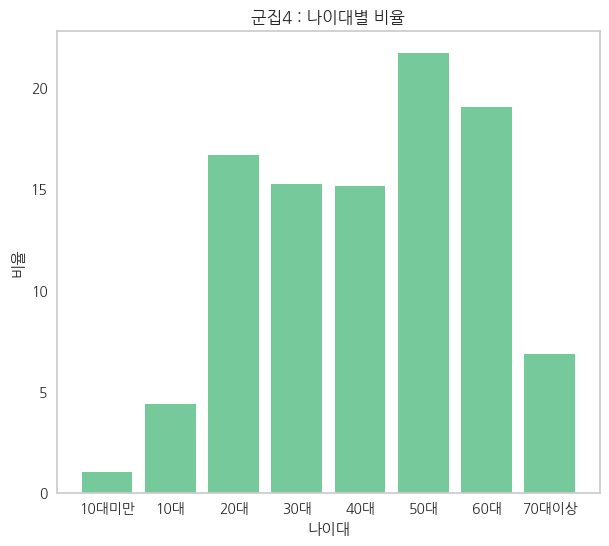

In [ ]:
a4 = c4[['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대이상']].mean()
print(a4)

xlab = ['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대이상']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=a4,
        color='mediumseagreen', width=0.8, alpha = 0.7)
plt.xlabel('나이대')
plt.ylabel('비율')
plt.grid(False)
plt.title('군집4 : 나이대별 비율')

### 군집별 지출액

### 식음료업 비율

In [ ]:
e0 = c0['식음료비율'].mean()
e1 = c1['식음료비율'].mean()
e2 = c2['식음료비율'].mean()
e3 = c3['식음료비율'].mean()
e4 = c4['식음료비율'].mean()

e = [e0, e1, e2, e3, e4]
e

[0.4652922228316217,
 0.5758349133008476,
 0.7089637044350972,
 0.5719354221049602,
 0.5778830340660456]

Text(0.5, 1.0, '소비액 전체 중 군집별 식음료업 비율')

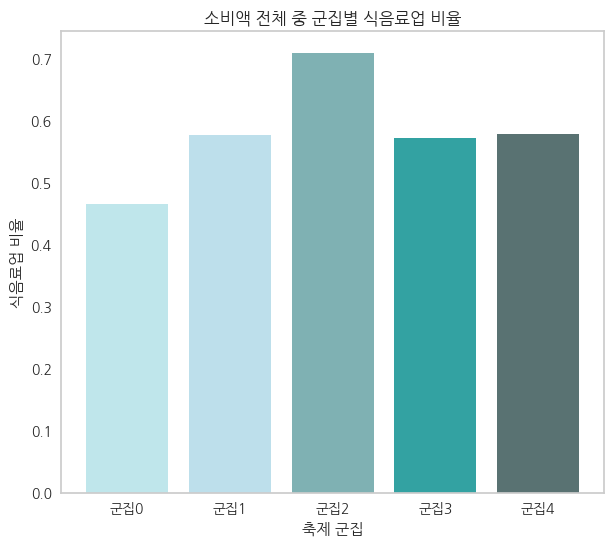

In [ ]:
xlab = ['군집0', '군집1', '군집2', '군집3', '군집4']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=e,
        color=['powderblue','lightblue','cadetblue', 'darkcyan','darkslategray'], width=0.8, alpha = 0.8)
plt.xlabel('축제 군집')
plt.ylabel('식음료업 비율')
plt.grid(False)
plt.title('소비액 전체 중 군집별 식음료업 비율')

### 수치 : 업종별 소비액

#### 군집 0

식음료업      265780.000000
여가서비스업     31730.666667
쇼핑업       403819.333333
숙박업        23811.666667
dtype: float64


Text(0.5, 1.0, '군집0 : 업종별 소비액')

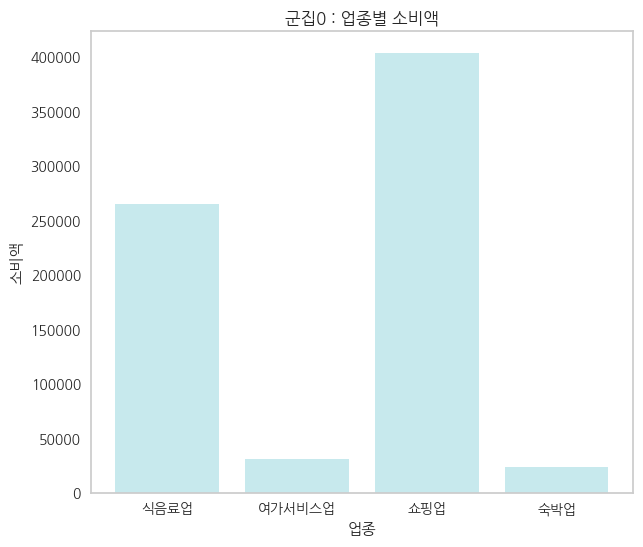

In [ ]:
b0 = c0[['식음료업','여가서비스업','쇼핑업','숙박업']].mean()
print(b0)

xlab = ['식음료업','여가서비스업','쇼핑업','숙박업']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=b0,
        color='powderblue', width=0.8, alpha = 0.7)
plt.xlabel('업종')
plt.ylabel('소비액')
plt.grid(False)
plt.title('군집0 : 업종별 소비액')

#### 군집 1

식음료업      318479.75
여가서비스업     98561.25
쇼핑업        69921.50
숙박업        35286.25
dtype: float64


Text(0.5, 1.0, '군집1 : 업종별 소비액')

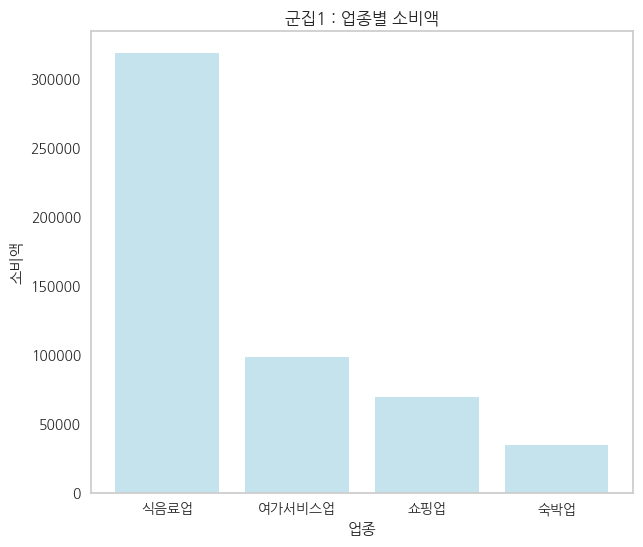

In [ ]:
b1 = c1[['식음료업','여가서비스업','쇼핑업','숙박업']].mean()
print(b1)

xlab = ['식음료업','여가서비스업','쇼핑업','숙박업']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=b1,
        color='lightblue', width=0.8, alpha = 0.7)
plt.xlabel('업종')
plt.ylabel('소비액')
plt.grid(False)
plt.title('군집1 : 업종별 소비액')

#### 군집 2

식음료업       52275.333333
여가서비스업     56689.333333
쇼핑업       152932.333333
숙박업         1378.500000
dtype: float64


Text(0.5, 1.0, '군집2 : 업종별 소비액')

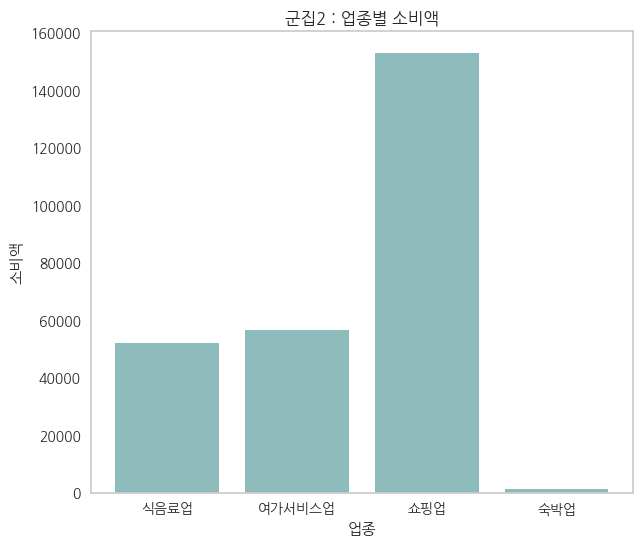

In [ ]:
b2 = c2[['식음료업','여가서비스업','쇼핑업','숙박업']].mean()
print(b2)

xlab = ['식음료업','여가서비스업','쇼핑업','숙박업']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=b2,
        color='cadetblue', width=0.8, alpha = 0.7)
plt.xlabel('업종')
plt.ylabel('소비액')
plt.grid(False)
plt.title('군집2 : 업종별 소비액')

#### 군집 3

식음료업      460926.0
여가서비스업     28956.5
쇼핑업       315041.0
숙박업        31535.5
dtype: float64


Text(0.5, 1.0, '군집3 : 업종별 소비액')

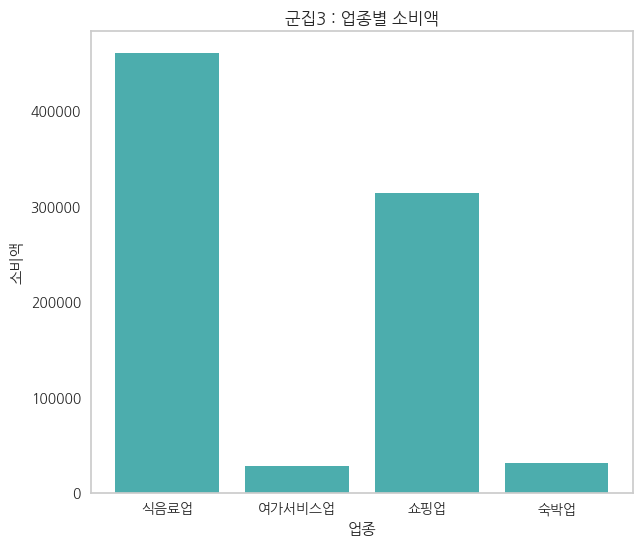

In [ ]:
b3 = c3[['식음료업','여가서비스업','쇼핑업','숙박업']].mean()
print(b3)

xlab = ['식음료업','여가서비스업','쇼핑업','숙박업']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=b3,
        color='darkcyan', width=0.8, alpha = 0.7)
plt.xlabel('업종')
plt.ylabel('소비액')
plt.grid(False)
plt.title('군집3 : 업종별 소비액')

#### 군집 4

식음료업      244341.666667
여가서비스업     48331.666667
쇼핑업       215110.666667
숙박업         4660.333333
dtype: float64


Text(0.5, 1.0, '군집4 : 업종별 소비액')

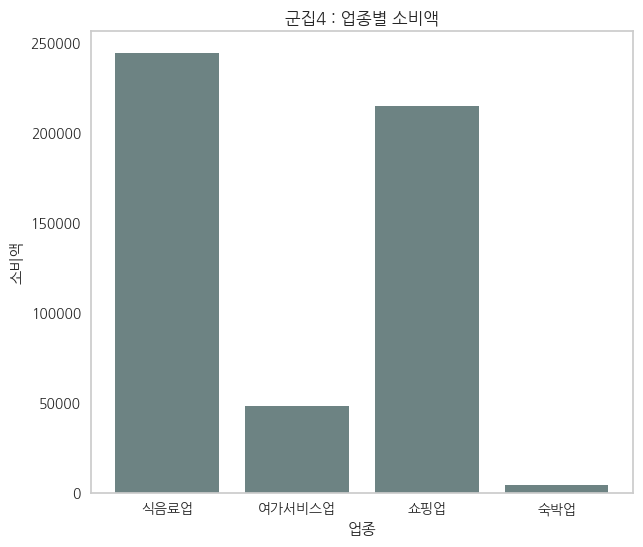

In [ ]:
b4 = c4[['식음료업','여가서비스업','쇼핑업','숙박업']].mean()
print(b4)

xlab = ['식음료업','여가서비스업','쇼핑업','숙박업']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=b4,
        color='darkslategray', width=0.8, alpha = 0.7)
plt.xlabel('업종')
plt.ylabel('소비액')
plt.grid(False)
plt.title('군집4 : 업종별 소비액')

### 순위 : 업종별 소비액

#### 군집 0

순위_식음료       2.666667
순위_여가서비스업    0.666667
순위_쇼핑업       1.666667
순위_숙박업       1.000000
dtype: float64


Text(0.5, 1.0, '군집0 : 업종별 소비액_순위')

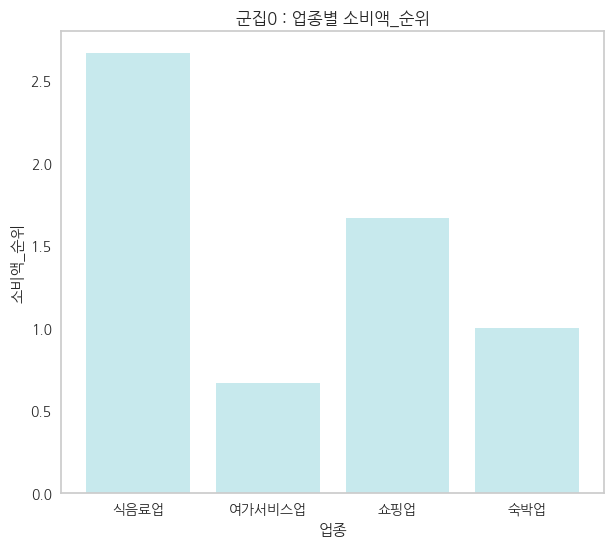

In [ ]:
r0 = c0[['순위_식음료', '순위_여가서비스업', '순위_쇼핑업', '순위_숙박업']].mean()
print(4-r0)

xlab = ['식음료업','여가서비스업','쇼핑업','숙박업']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=4-r0,
        color='powderblue', width=0.8, alpha = 0.7)
plt.xlabel('업종')
plt.ylabel('소비액_순위')
plt.grid(False)
plt.title('군집0 : 업종별 소비액_순위')

#### 군집 1

순위_식음료       3.00
순위_여가서비스업    1.25
순위_쇼핑업       0.75
순위_숙박업       1.00
dtype: float64


Text(0.5, 1.0, '군집1 : 업종별 소비액_순위')

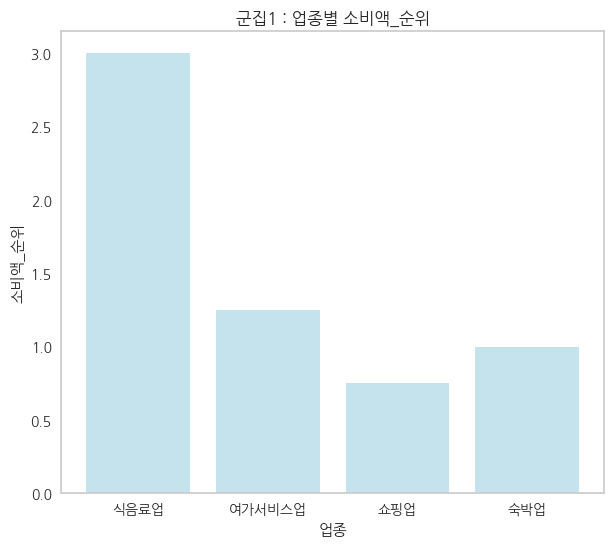

In [ ]:
r1 = c1[['순위_식음료', '순위_여가서비스업', '순위_쇼핑업', '순위_숙박업']].mean()
print(4-r1)


xlab = ['식음료업','여가서비스업','쇼핑업','숙박업']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=4-r1,
        color='lightblue', width=0.8, alpha = 0.7)
plt.xlabel('업종')
plt.ylabel('소비액_순위')
plt.grid(False)
plt.title('군집1 : 업종별 소비액_순위')

#### 군집 2

순위_식음료       2.666667
순위_여가서비스업    1.500000
순위_쇼핑업       0.833333
순위_숙박업       1.000000
dtype: float64


Text(0.5, 1.0, '군집2 : 업종별 소비액_순위')

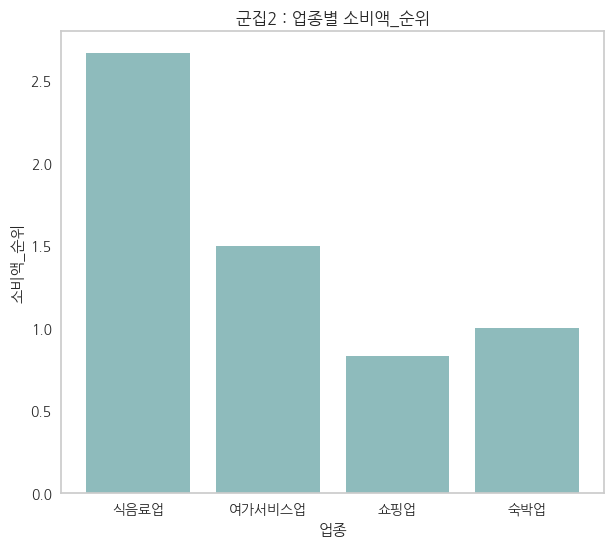

In [ ]:
r2 = c2[['순위_식음료', '순위_여가서비스업', '순위_쇼핑업', '순위_숙박업']].mean()
print(4-r2)


xlab = ['식음료업','여가서비스업','쇼핑업','숙박업']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=4-r2,
        color='cadetblue', width=0.8, alpha = 0.7)
plt.xlabel('업종')
plt.ylabel('소비액_순위')
plt.grid(False)
plt.title('군집2 : 업종별 소비액_순위')

#### 군집 3

순위_식음료       3.0
순위_여가서비스업    0.5
순위_쇼핑업       2.0
순위_숙박업       0.5
dtype: float64


Text(0.5, 1.0, '군집3 : 업종별 소비액_순위')

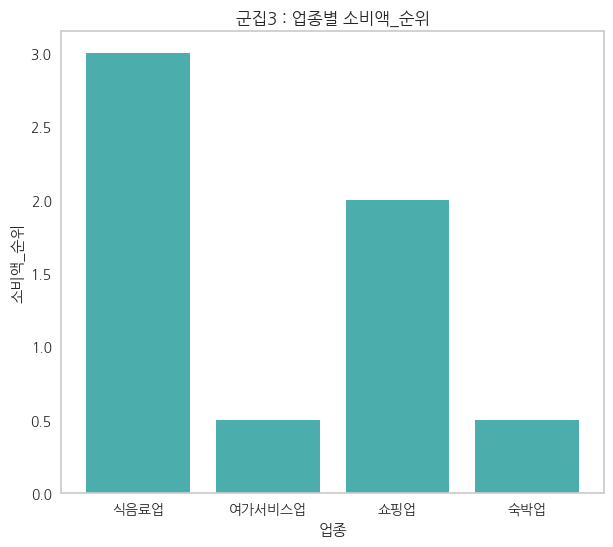

In [ ]:
r3 = c3[['순위_식음료', '순위_여가서비스업', '순위_쇼핑업', '순위_숙박업']].mean()
print(4-r3)


xlab = ['식음료업','여가서비스업','쇼핑업','숙박업']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=4-r3,
        color='darkcyan', width=0.8, alpha = 0.7)
plt.xlabel('업종')
plt.ylabel('소비액_순위')
plt.grid(False)
plt.title('군집3 : 업종별 소비액_순위')

#### 군집 4

순위_식음료       2.666667
순위_여가서비스업    1.666667
순위_쇼핑업       1.333333
순위_숙박업       0.333333
dtype: float64


Text(0.5, 1.0, '군집4 : 업종별 소비액_순위')

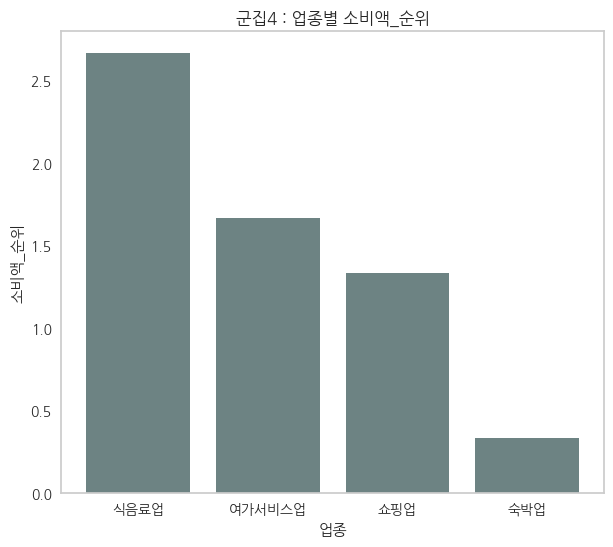

In [ ]:
r4 = c4[['순위_식음료', '순위_여가서비스업', '순위_쇼핑업', '순위_숙박업']].mean()
print(4-r4)


xlab = ['식음료업','여가서비스업','쇼핑업','숙박업']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=4-r4,
        color='darkslategray', width=0.8, alpha = 0.7)
plt.xlabel('업종')
plt.ylabel('소비액_순위')
plt.grid(False)
plt.title('군집4 : 업종별 소비액_순위')

### 수치 : 업종별 각 군집 소비액

In [ ]:
d0 = c0[['식음료업','여가서비스업','쇼핑업','숙박업']].mean()
d1 = c1[['식음료업','여가서비스업','쇼핑업','숙박업']].mean()
d2 = c2[['식음료업','여가서비스업','쇼핑업','숙박업']].mean()
d3 = c3[['식음료업','여가서비스업','쇼핑업','숙박업']].mean()
d4 = c4[['식음료업','여가서비스업','쇼핑업','숙박업']].mean()

d = pd.DataFrame(zip(d0,d1,d2,d3,d4), columns = ['군집0','군집1','군집2','군집3','군집4'], index=d1.index)
d

,군집0,군집1,군집2,군집3,군집4
식음료업,265780.000000,318479.75,52275.333333,460926.0,244341.666667
여가서비스업,31730.666667,98561.25,56689.333333,28956.5,48331.666667
쇼핑업,403819.333333,69921.50,152932.333333,315041.0,215110.666667
숙박업,23811.666667,35286.25,1378.500000,31535.5,4660.333333


#### 식음료 소비액

           군집0        군집1           군집2       군집3            군집4
식음료업  265780.0  318479.75  52275.333333  460926.0  244341.666667


Text(0.5, 1.0, '군집별 식음료업 소비액')

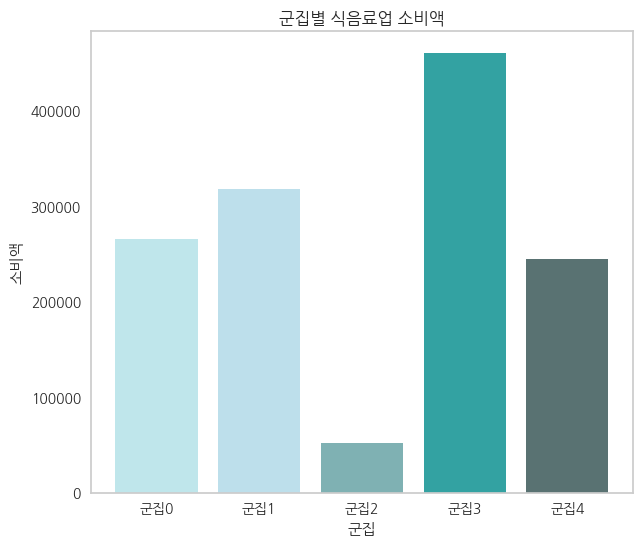

In [ ]:
print(d.loc[['식음료업']])

xlab = ['군집0', '군집1', '군집2', '군집3', '군집4']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=d.loc[['식음료업']].values.tolist()[0],
        color=['powderblue','lightblue','cadetblue', 'darkcyan','darkslategray'], width=0.8, alpha = 0.8)
plt.xlabel('군집')
plt.ylabel('소비액')
plt.grid(False)
plt.title('군집별 식음료업 소비액')

#### 여가서비스업 소비액

                 군집0       군집1           군집2      군집3           군집4
여가서비스업  31730.666667  98561.25  56689.333333  28956.5  48331.666667


Text(0.5, 1.0, '군집별 여가서비스업 소비액')

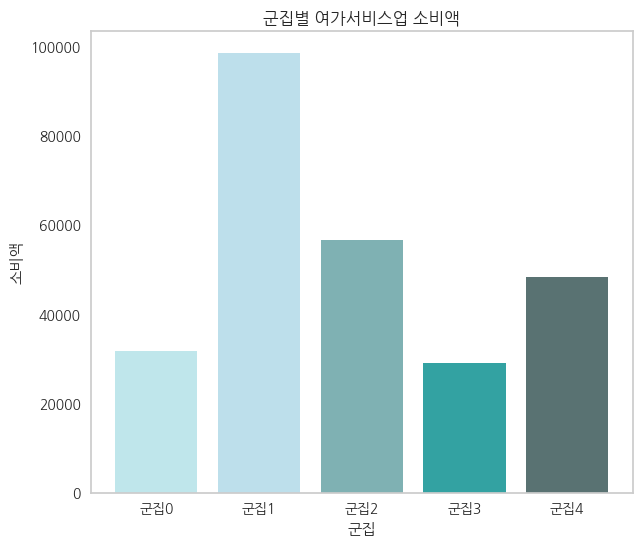

In [ ]:
print(d.loc[['여가서비스업']])

xlab = ['군집0', '군집1', '군집2', '군집3', '군집4']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=d.loc[['여가서비스업']].values.tolist()[0],
        color=['powderblue','lightblue','cadetblue', 'darkcyan','darkslategray'], width=0.8, alpha = 0.8)
plt.xlabel('군집')
plt.ylabel('소비액')
plt.grid(False)
plt.title('군집별 여가서비스업 소비액')

#### 쇼핑업 소비액

               군집0      군집1            군집2       군집3            군집4
쇼핑업  403819.333333  69921.5  152932.333333  315041.0  215110.666667


Text(0.5, 1.0, '군집별 쇼핑업 소비액')

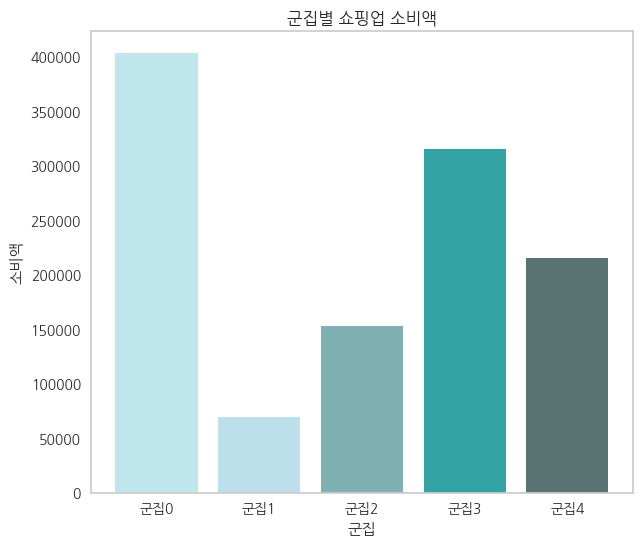

In [ ]:
print(d.loc[['쇼핑업']])

xlab = ['군집0', '군집1', '군집2', '군집3', '군집4']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=d.loc[['쇼핑업']].values.tolist()[0],
        color=['powderblue','lightblue','cadetblue', 'darkcyan','darkslategray'], width=0.8, alpha = 0.8)
plt.xlabel('군집')
plt.ylabel('소비액')
plt.grid(False)
plt.title('군집별 쇼핑업 소비액')

#### 숙박업 소비액

              군집0       군집1     군집2      군집3          군집4
숙박업  23811.666667  35286.25  1378.5  31535.5  4660.333333


Text(0.5, 1.0, '군집별 숙박업 소비액')

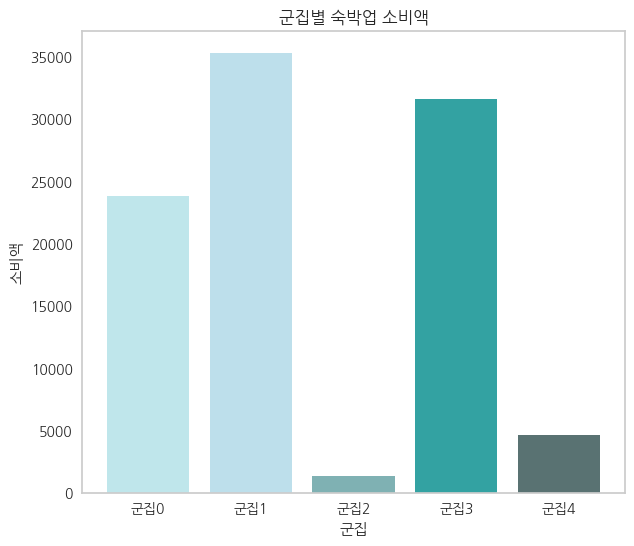

In [ ]:
print(d.loc[['숙박업']])

xlab = ['군집0', '군집1', '군집2', '군집3', '군집4']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=d.loc[['숙박업']].values.tolist()[0],
        color=['powderblue','lightblue','cadetblue', 'darkcyan','darkslategray'], width=0.8, alpha = 0.8)
plt.xlabel('군집')
plt.ylabel('소비액')
plt.grid(False)
plt.title('군집별 숙박업 소비액')

### 순위 : 업종별 각 군집 소비액

In [ ]:
p0 = c0[['순위_식음료', '순위_여가서비스업', '순위_쇼핑업', '순위_숙박업']].mean()
p1 = c1[['순위_식음료', '순위_여가서비스업', '순위_쇼핑업', '순위_숙박업']].mean()
p2 = c2[['순위_식음료', '순위_여가서비스업', '순위_쇼핑업', '순위_숙박업']].mean()
p3 = c3[['순위_식음료', '순위_여가서비스업', '순위_쇼핑업', '순위_숙박업']].mean()
p4 = c4[['순위_식음료', '순위_여가서비스업', '순위_쇼핑업', '순위_숙박업']].mean()

p = pd.DataFrame(zip(p0,p1,p2,p3,p4), columns = ['군집0','군집1','군집2','군집3','군집4'], index=p1.index)
p_sc = 4-p
p_sc

,군집0,군집1,군집2,군집3,군집4
순위_식음료,2.666667,3.00,2.666667,3.0,2.666667
순위_여가서비스업,0.666667,1.25,1.500000,0.5,1.666667
순위_쇼핑업,1.666667,0.75,0.833333,2.0,1.333333
순위_숙박업,1.000000,1.00,1.000000,0.5,0.333333


#### 식음료업 소비액 순위

             군집0  군집1       군집2  군집3       군집4
순위_식음료  2.666667  3.0  2.666667  3.0  2.666667


Text(0.5, 1.0, '군집별 식음료업 소비액_순위')

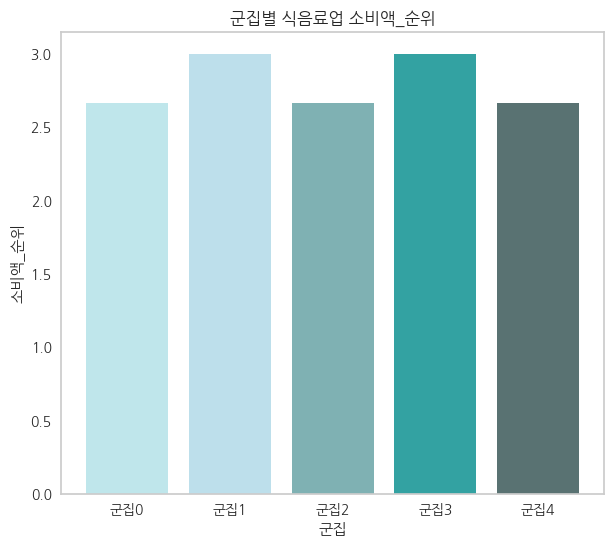

In [ ]:
print(p_sc.loc[['순위_식음료']])

xlab = ['군집0', '군집1', '군집2', '군집3', '군집4']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=p_sc.loc[['순위_식음료']].values.tolist()[0],
        color=['powderblue','lightblue','cadetblue', 'darkcyan','darkslategray'], width=0.8, alpha = 0.8)
plt.xlabel('군집')
plt.ylabel('소비액_순위')
plt.grid(False)
plt.title('군집별 식음료업 소비액_순위')

#### 여가서비스업 소비액 순위

                군집0   군집1  군집2  군집3       군집4
순위_여가서비스업  0.666667  1.25  1.5  0.5  1.666667


Text(0.5, 1.0, '군집별 여가서비스업 소비액_순위')

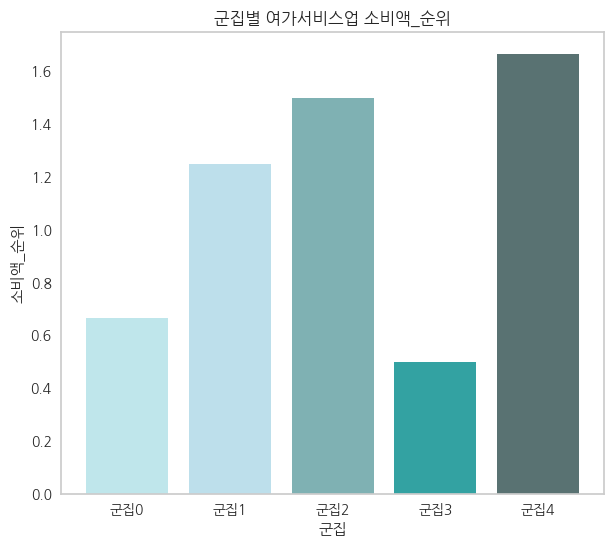

In [ ]:
print(p_sc.loc[['순위_여가서비스업']])

xlab = ['군집0', '군집1', '군집2', '군집3', '군집4']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=p_sc.loc[['순위_여가서비스업']].values.tolist()[0],
        color=['powderblue','lightblue','cadetblue', 'darkcyan','darkslategray'], width=0.8, alpha = 0.8)
plt.xlabel('군집')
plt.ylabel('소비액_순위')
plt.grid(False)
plt.title('군집별 여가서비스업 소비액_순위')

#### 쇼핑업 소비액 순위

             군집0   군집1       군집2  군집3       군집4
순위_쇼핑업  1.666667  0.75  0.833333  2.0  1.333333


Text(0.5, 1.0, '군집별 쇼핑업 소비액_순위')

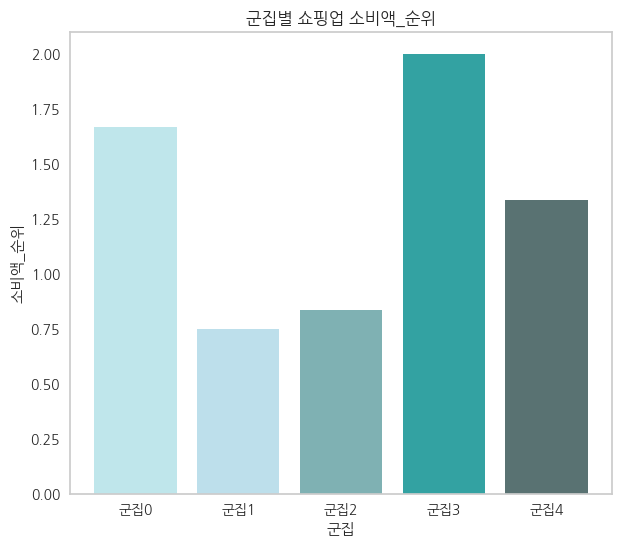

In [ ]:
print(p_sc.loc[['순위_쇼핑업']])

xlab = ['군집0', '군집1', '군집2', '군집3', '군집4']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=p_sc.loc[['순위_쇼핑업']].values.tolist()[0],
        color=['powderblue','lightblue','cadetblue', 'darkcyan','darkslategray'], width=0.8, alpha = 0.8)
plt.xlabel('군집')
plt.ylabel('소비액_순위')
plt.grid(False)
plt.title('군집별 쇼핑업 소비액_순위')

#### 숙박업 소비액 순위

        군집0  군집1  군집2  군집3       군집4
순위_숙박업  1.0  1.0  1.0  0.5  0.333333


Text(0.5, 1.0, '군집별 숙박업 소비액_순위')

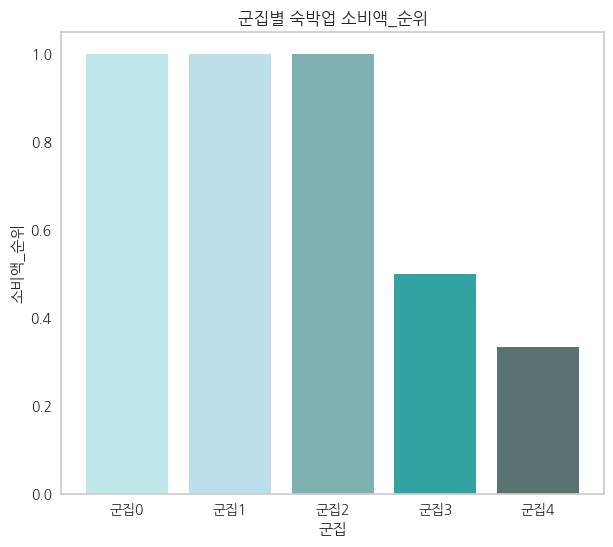

In [ ]:
print(p_sc.loc[['순위_숙박업']])

xlab = ['군집0', '군집1', '군집2', '군집3', '군집4']

plt.figure(figsize=(7,6))

plt.bar(x=xlab, height=p_sc.loc[['순위_숙박업']].values.tolist()[0],
        color=['powderblue','lightblue','cadetblue', 'darkcyan','darkslategray'], width=0.8, alpha = 0.8)
plt.xlabel('군집')
plt.ylabel('소비액_순위')
plt.grid(False)
plt.title('군집별 숙박업 소비액_순위')